<a href="https://colab.research.google.com/github/NaithaniAR/CapstoneProject-MLClassification/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

Mounting Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 10.8 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from prettytable import PrettyTable

#Import Machine Learning Models
from sklearn.linear_model import Ridge,Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB

# Importing library for Measuring Accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Importing library for Training And Testing Data 
from sklearn.model_selection import train_test_split #split


#Tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import os
#print(os.listdir("../input"))



#Ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

Importing Datasets 

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/bank-full.csv',sep=';')

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Marketing
Marketing is the process of exploring, creating, and delivering value to meet the needs of a target market in terms of goods and services; potentially including selection of a target audience; selection of certain attributes or themes to emphasize in advertising; operation of advertising campaigns; attendance at trade shows and public events; design of products and packaging attractive to buyers; defining the terms of sale, such as price, discounts, warranty, and return policy; product placement in media or with people believed to influence the buying habits of others; agreements with retailers, wholesale distributors, or resellers; and attempts to create awareness of, loyalty to, and positive feelings about a brand

## Data Exploration

In [6]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
# Catagorical columns 
categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

# Numerical columns
numerical_features  = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']


In [10]:
# Pearson correlation coefficient
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


## Checking for null values 

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

#**I.** Exploratory data analysis 


## A. Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

Categorical columns 


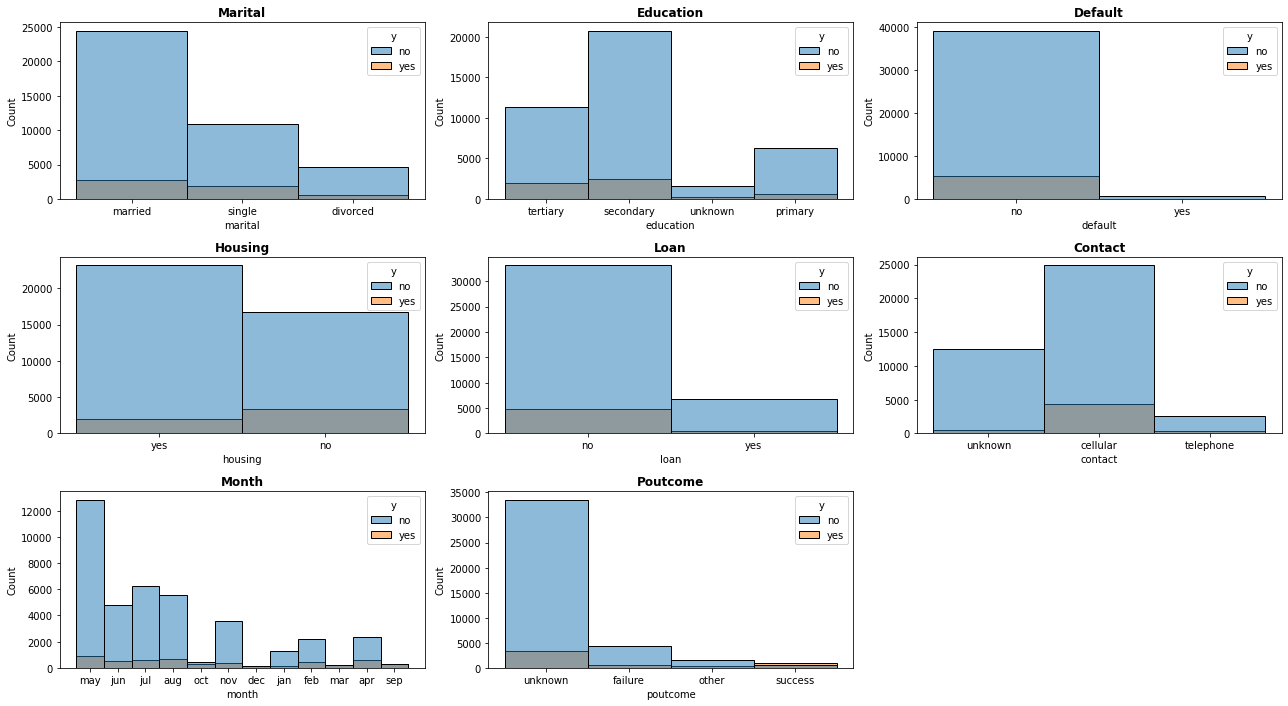

In [13]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))

categoricall_features  = [ 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
for n,column in enumerate(df[categoricall_features]):
  
  feature = df[column]
  ax=plt.subplot(5, 3, n+1)
  sns.histplot( x=feature,hue=df.y)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [14]:
categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

<Figure size 1296x864 with 0 Axes>

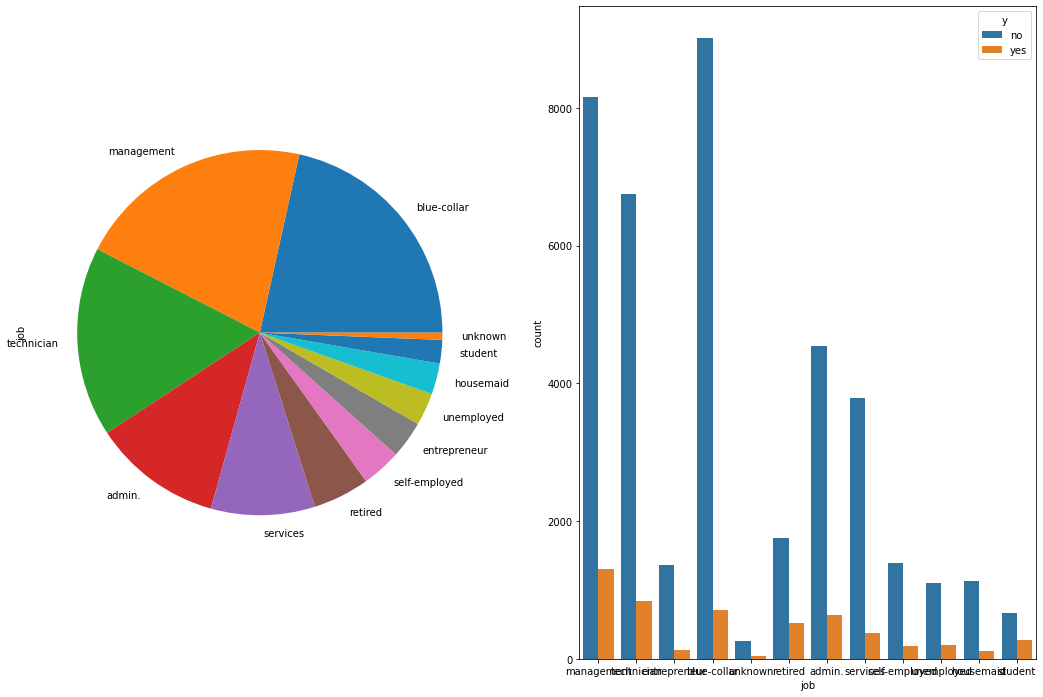

<Figure size 1296x864 with 0 Axes>

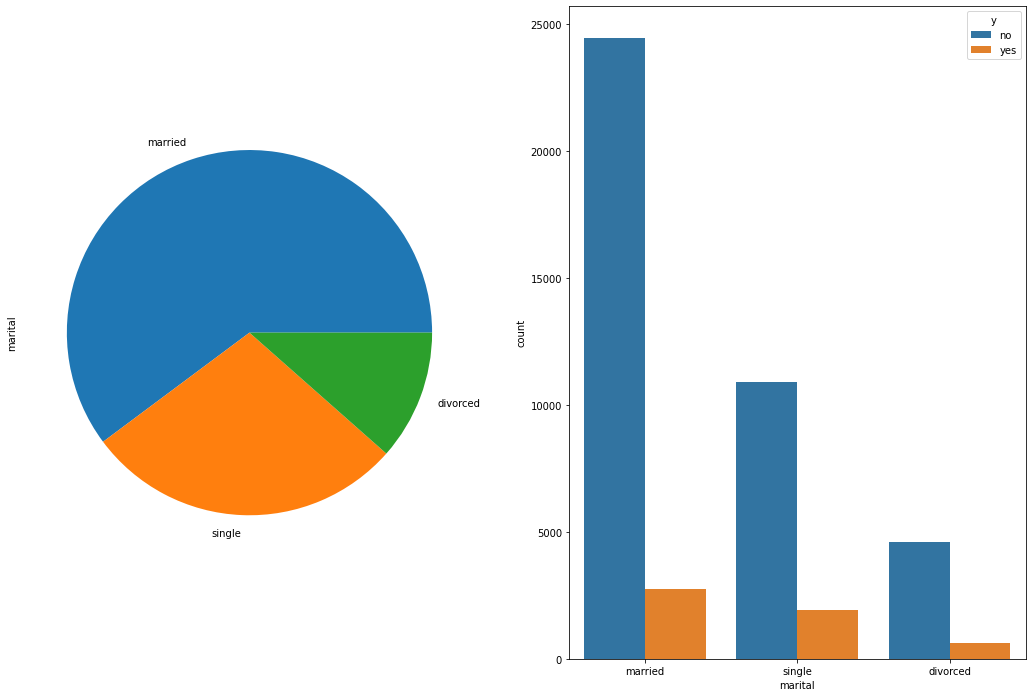

<Figure size 1296x864 with 0 Axes>

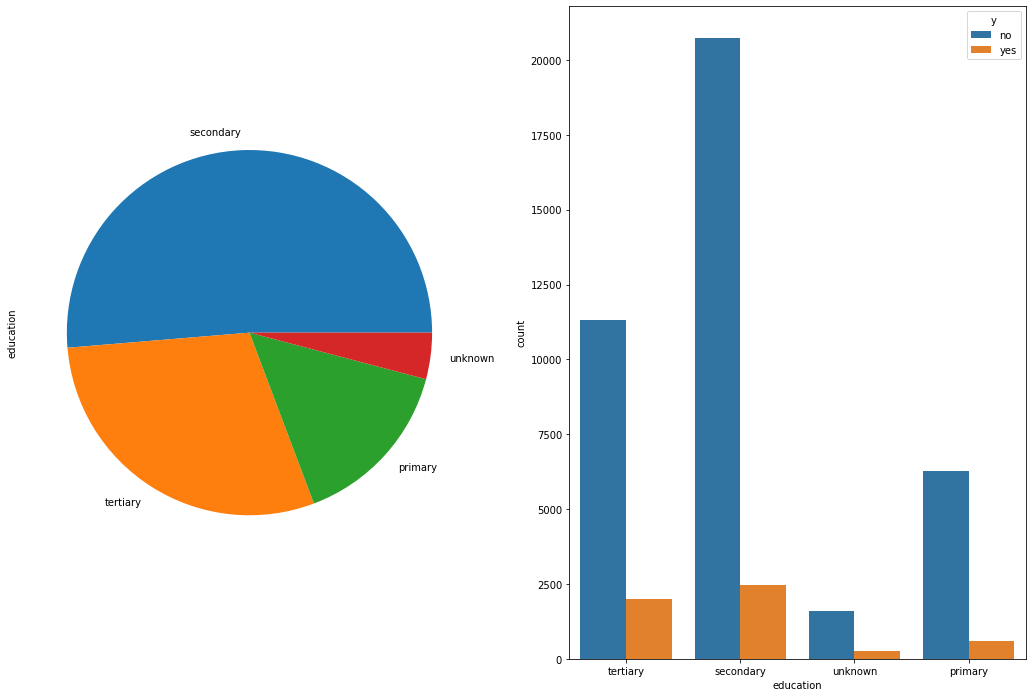

<Figure size 1296x864 with 0 Axes>

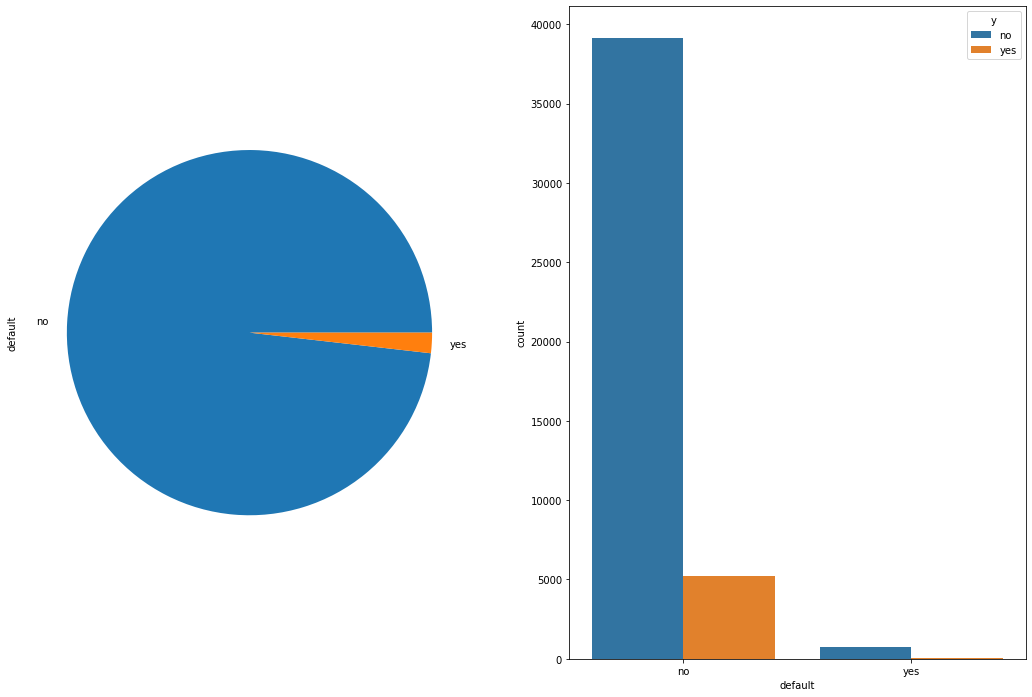

<Figure size 1296x864 with 0 Axes>

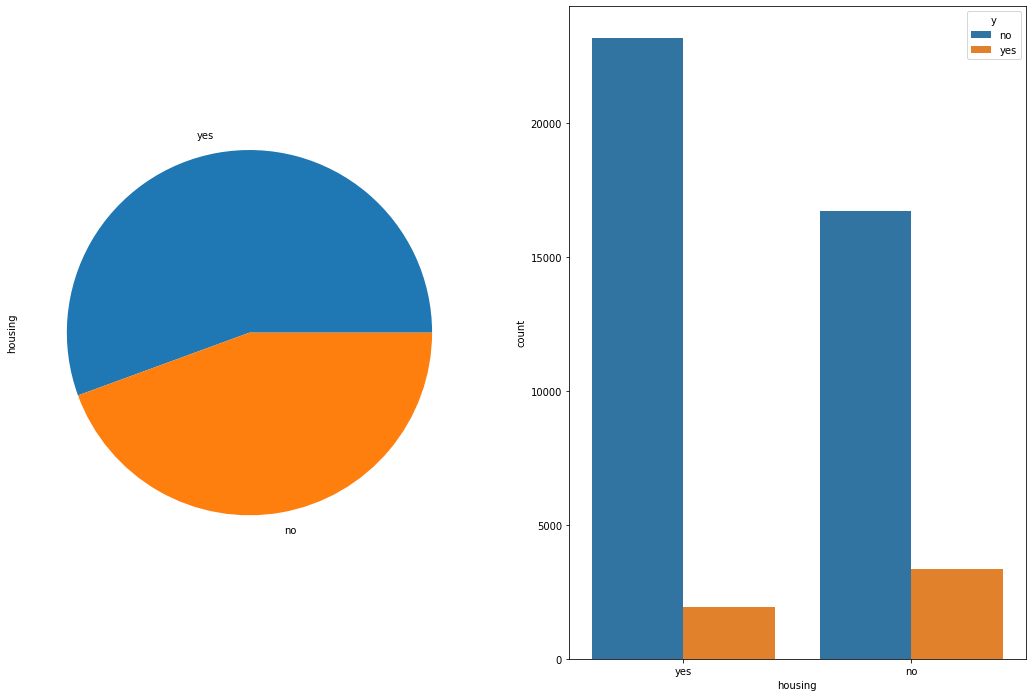

<Figure size 1296x864 with 0 Axes>

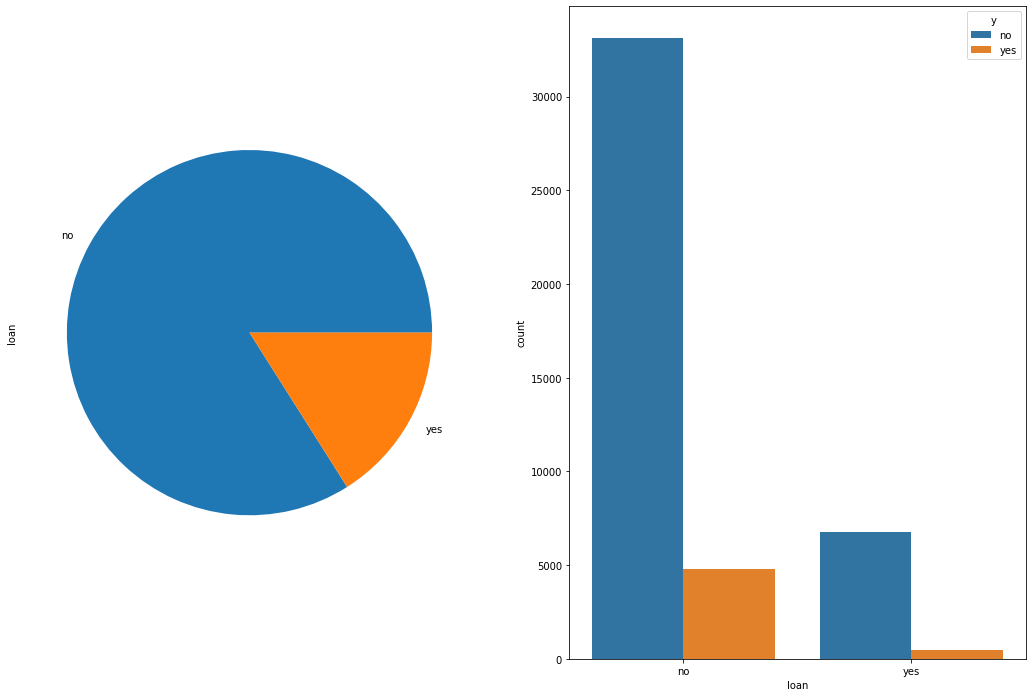

<Figure size 1296x864 with 0 Axes>

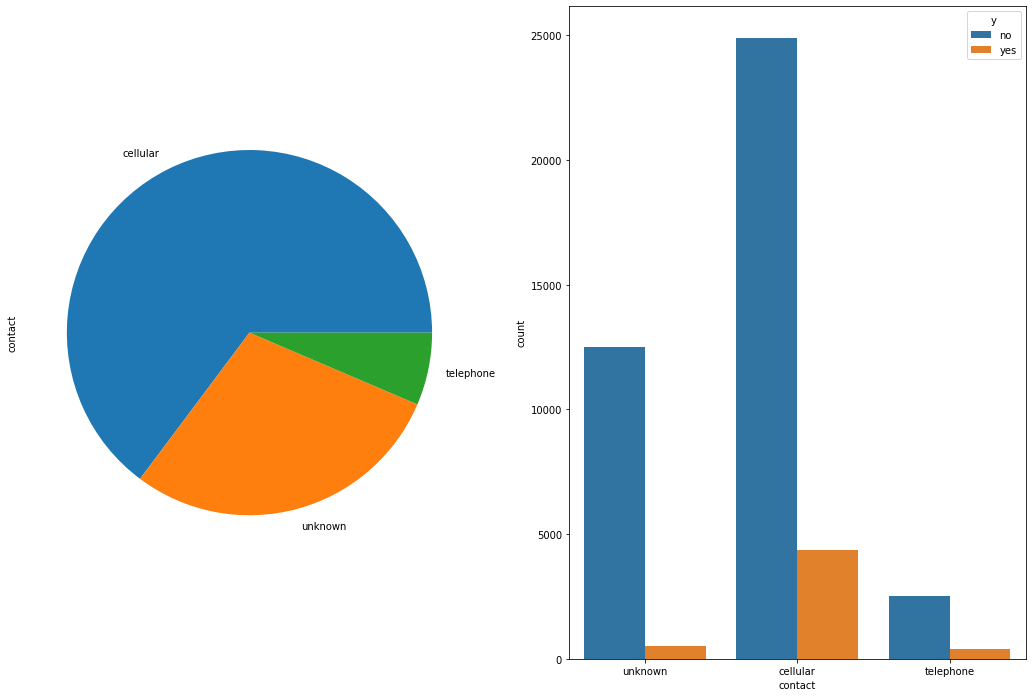

<Figure size 1296x864 with 0 Axes>

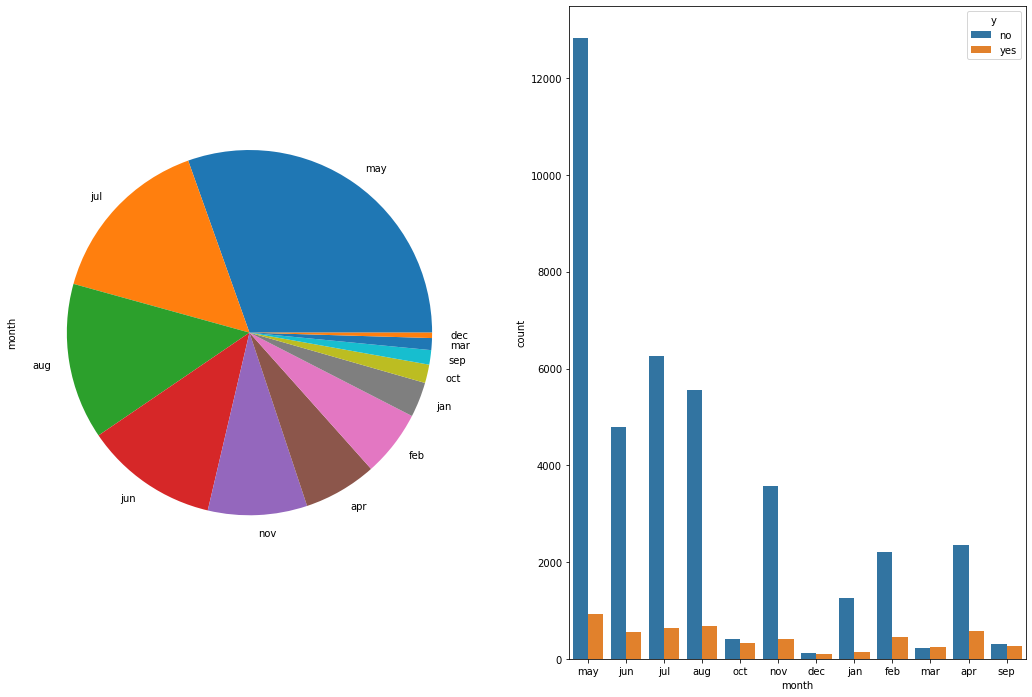

<Figure size 1296x864 with 0 Axes>

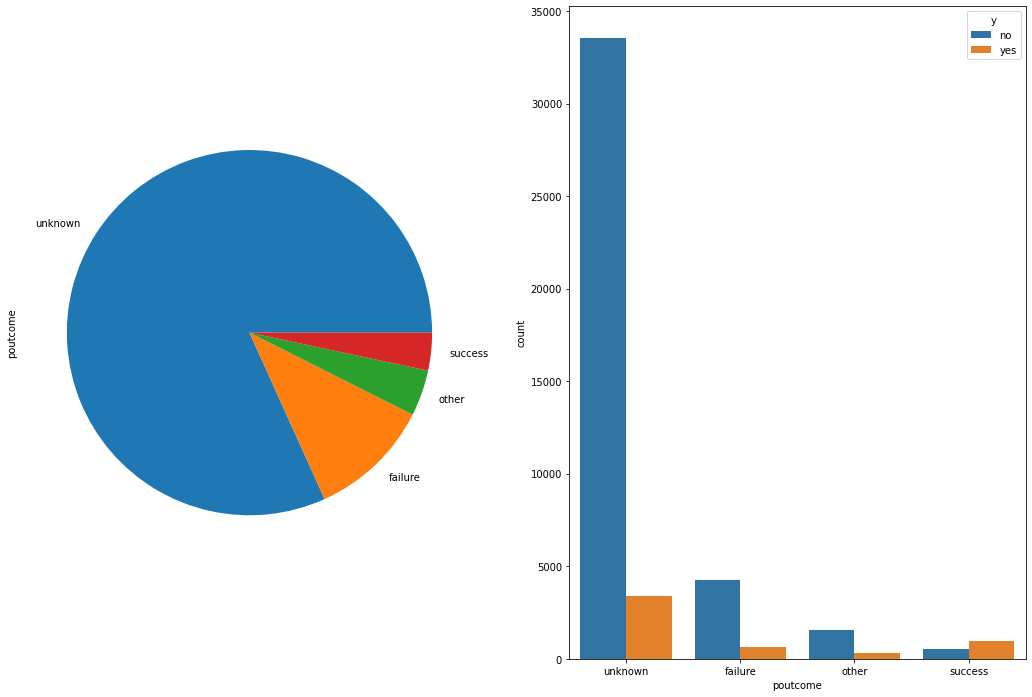

In [15]:
#plot to determine the relationship between categories

for col in categorical_features:
  plt.figure(figsize=(18,12))
  fig, axes = plt.subplots(ncols=2,figsize=(18,12))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'y', data = df)

Numerical columns 


In [21]:
pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import seaborn as sns

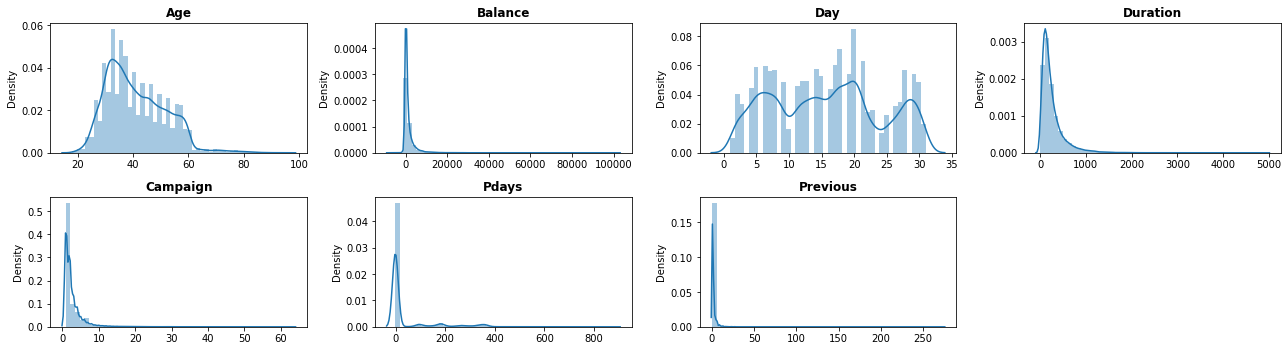

In [34]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(numerical_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(x= df[column],kde=True)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns).We should have a look closer at the data.



 pdays shows number of days that has passed  after the client was last contacted from a previous campaign. in this variable values range from -1 to 871. Assuming -1 means that the customer was contacted and no days has lapsed since last contact.Since the entry in data has info of existing clients it makes sense that the client was definitely contacted atleast once, will further verify this theory 

In [ ]:
df.loc[(df['pdays']==-1) & (df['y']=='yes')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00
mean,41.22,1701.31,15.40,610.50,2.34,-1.00,0.00
std,13.24,3115.38,8.53,423.18,2.21,0.00,0.00
min,18.00,-3058.00,1.00,8.00,1.00,-1.00,0.00
25%,31.00,172.75,8.00,276.00,1.00,-1.00,0.00
50%,38.00,674.00,15.00,529.00,2.00,-1.00,0.00
75%,50.00,2016.50,21.00,835.00,3.00,-1.00,0.00
max,95.00,52587.00,31.00,3881.00,32.00,-1.00,0.00


In [ ]:
df.loc[(df['pdays']==-1) & (df['y']=='no')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00
mean,40.90,1280.23,16.22,222.17,2.98,-1.00,0.00
std,10.10,3029.18,8.35,209.42,3.41,0.00,0.00
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,48.00,9.00,95.00,1.00,-1.00,0.00
50%,39.00,393.00,17.00,164.00,2.00,-1.00,0.00
75%,48.00,1306.00,22.00,281.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,-1.00,0.00


Since accounts exist  which subscribed and have pdays as -1,all the observatios with pday -1 has zero previous which tilts slightly in our assumption.

## B. Analysis

Q. Visualise the effect of duration and campaign on the success of the marketing. 

Text(0.5, 0.98, 'Success of Current Subscription')

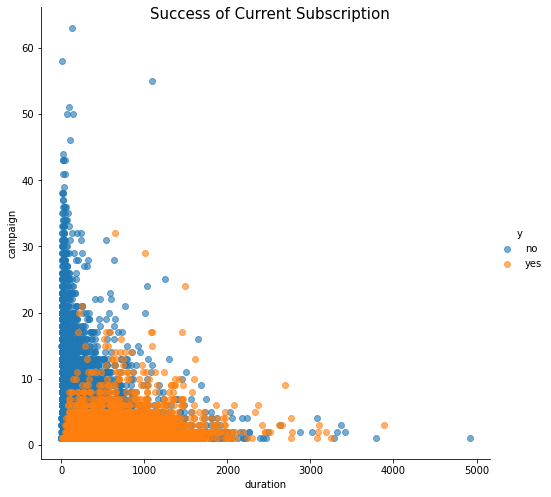

In [ ]:
# Corelation Between Duration & Success of Subscription (Current Campaign & Previous Campaign)

q=sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)
q.fig.suptitle("Success of Current Subscription",
                  fontsize=15, fontdict={"weight": "bold"})

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after ten campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should device a stratagy to incentivise the clients to stay on call, try and avoid calling the client multiple times and try to close the cliet in the fixed deposite as soon as possible. 


Q. 
Finding Relation Based on balance of Customer and Subscription of Term Deposit

In [ ]:
df.balance.value_counts(bins=6)

(-8129.147, 10338.667]    44442
(10338.667, 28696.333]      705
(28696.333, 47054.0]         46
(47054.0, 65411.667]         11
(65411.667, 83769.333]        5
(83769.333, 102127.0]         2
Name: balance, dtype: int64

Text(0.5, 0, 'Balance greater than 83769')

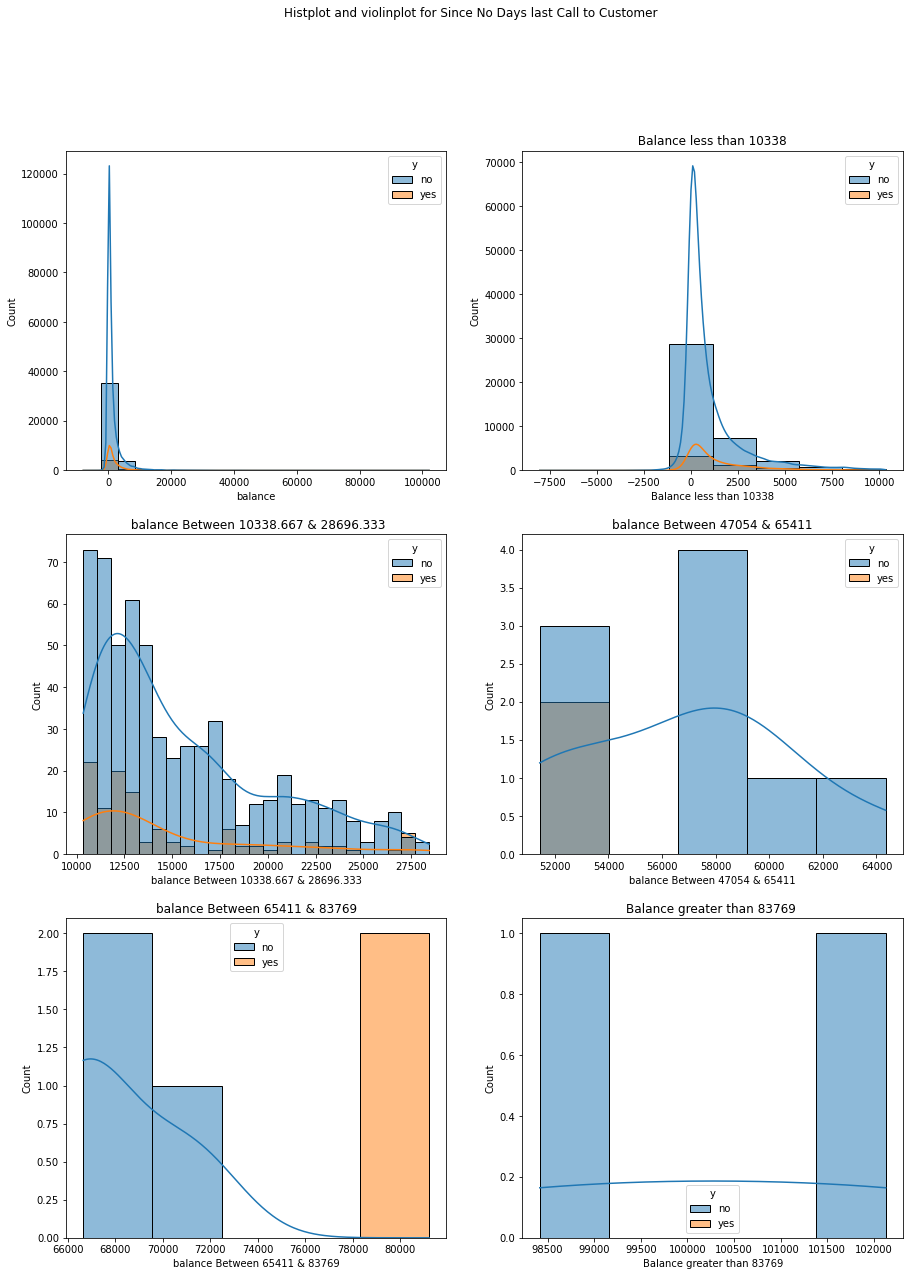

In [ ]:
## Finding Relation Based on balance of Customer and Subscription of Term Deposit
fig, axes = plt.subplots(3, 2, figsize=(15,20))
fig.suptitle('Histplot and violinplot for Since No Days last Call to Customer')
# Histplot
sns.histplot(ax=axes[0,0], data=df, x="balance",hue='y', bins=20,kde=True)
# Histplot  
p=sns.histplot(ax=axes[0,1], data=df, x=df[df['balance']<10338.667].balance,hue='y',bins=8,kde=True)
p.set_title(' Balance less than 10338 ')
p.set_xlabel('Balance less than 10338')
# Histplot  
p=sns.histplot(ax=axes[1,0], data=df, x=df[(df['balance']>10338.667) & (df['balance']<=28696.333)].balance,hue='y',bins=25,kde=True)
p.set_title(' balance Between 10338.667 & 28696.333')
p.set_xlabel('balance Between 10338.667 & 28696.333')
# Histplot  
p=sns.histplot(ax=axes[1,1], data=df, x=df[(df['balance']>47054) & (df['balance']<=65411)].balance,hue='y',bins=5,kde=True)
p.set_title('balance Between 47054 & 65411')
p.set_xlabel('balance Between 47054 & 65411')
# Histplot  
p=sns.histplot(ax=axes[2,0], data=df, x=df[(df['balance']>65411) & (df['balance']<=83769)].balance,hue='y',bins=5,kde=True)
p.set_title('balance Between 65411 & 83769')
p.set_xlabel('balance Between 65411 & 83769')
# Histplot   
q=sns.histplot(ax=axes[2,1], data=df, x=df[df['balance']>83769].balance,hue='y',bins=5,kde=True)
q.set_title('Balance greater than 83769 ')
q.set_xlabel('Balance greater than 83769')

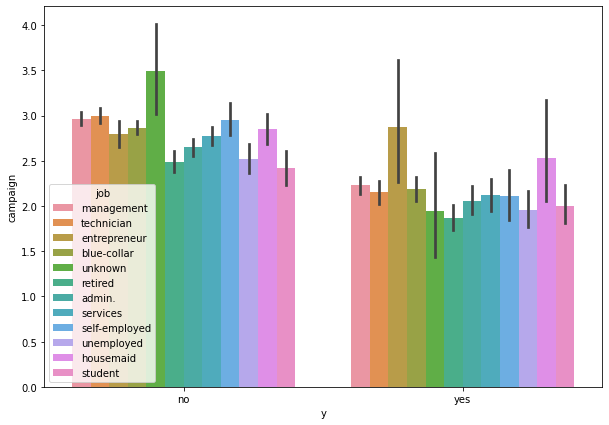

In [ ]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(df['y'], df['campaign'], hue=df['job'])
plt.show()

Q. What is the distribution of people joining and not joining the term deposite ?

In [ ]:
len(df.y)

45211

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

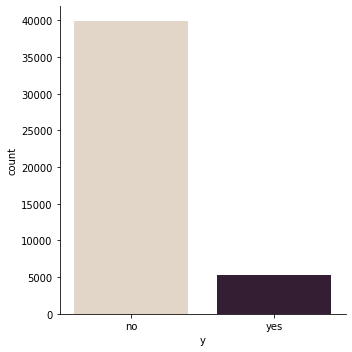

In [ ]:
sns.catplot(x="y", kind="count", palette="ch:.25", data=df)

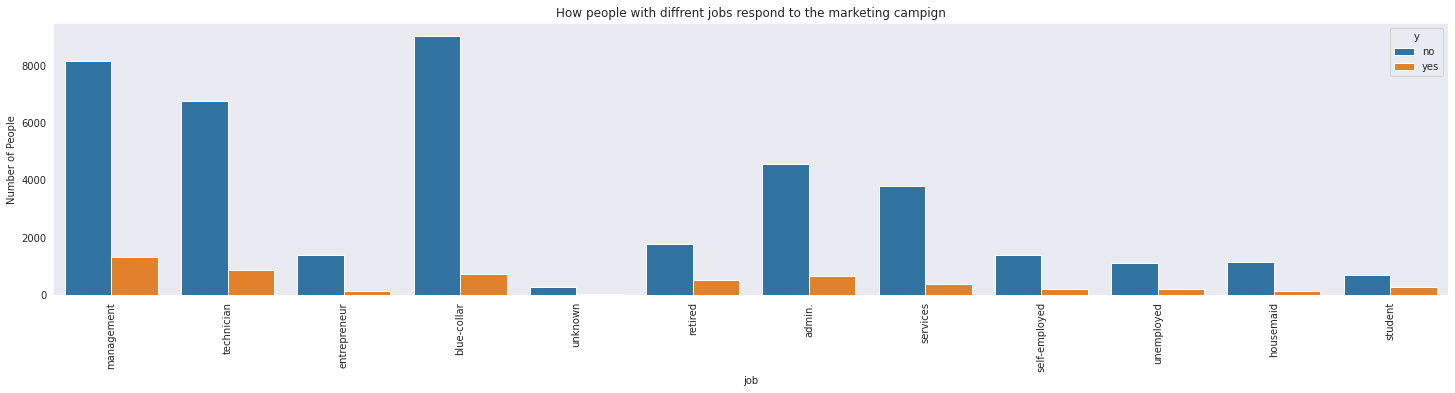

In [ ]:
#PLotting Category distribution wrt. no of installs 
sns.set_style('dark')
plt.figure(figsize=(25, 5))
sns.countplot(x='job', data=df, hue= 'y')
plt.title('How people with diffrent jobs respond to the marketing campign')
plt.xticks(rotation=90)
plt.ylabel('Number of People')
plt.show()

Q. Exploring how people who default on loans, respond to the marketing campaigns


In [ ]:
#Exploring the effect of default on the marketing campaigns. 
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

As we can see, numbers tend to bend towards people who do not default on their loans. 


#**II.** Data Preparation 

##A. Outliers 

In [ ]:
df[df.balance<0].describe()

,age,balance,day,duration,campaign,pdays,previous
count,3766.00,3766.00,3766.00,3766.00,3766.00,3766.00,3766.00
mean,39.48,-317.68,16.44,252.10,2.93,35.31,0.41
std,9.07,368.99,8.58,250.28,3.47,99.97,1.61
min,20.00,-8019.00,1.00,4.00,1.00,-1.00,0.00
25%,32.00,-422.00,9.00,105.00,1.00,-1.00,0.00
50%,38.00,-230.00,16.00,176.00,2.00,-1.00,0.00
75%,46.00,-93.00,24.00,305.00,3.00,-1.00,0.00
max,63.00,-1.00,31.00,3253.00,43.00,670.00,25.00


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


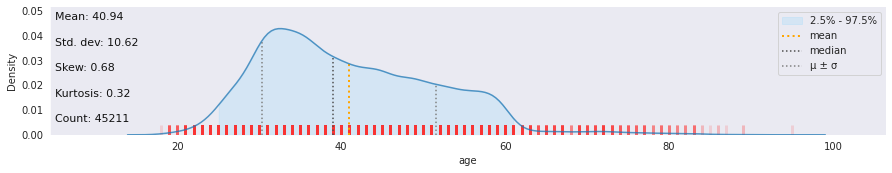

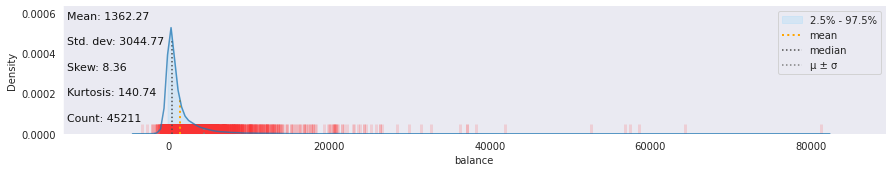

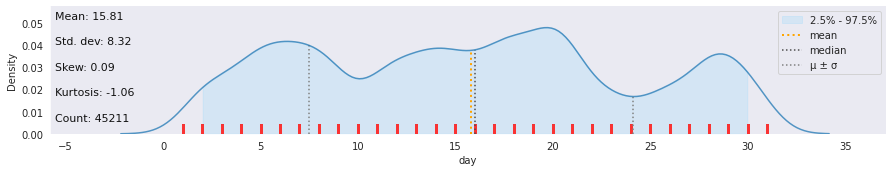

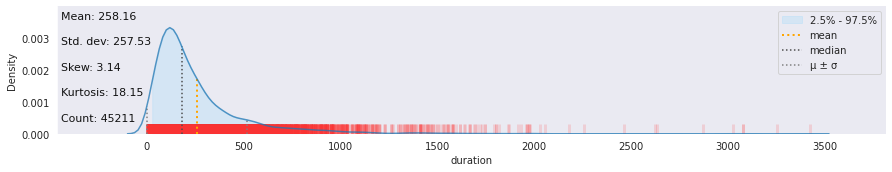

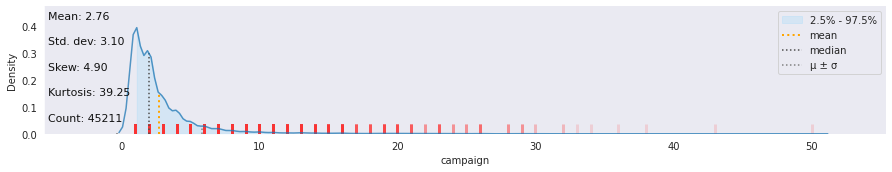

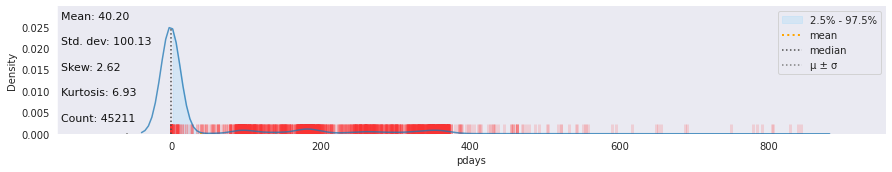

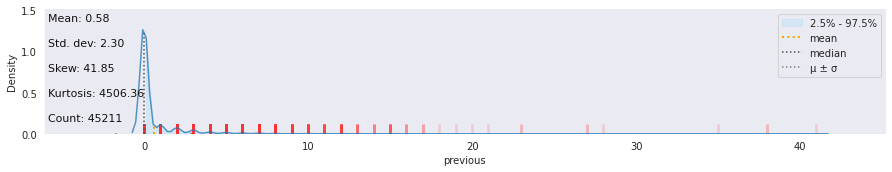

In [ ]:
# default representation of a distribution plot
klib.dist_plot(df)

1.  Age plot is Showing Outliers to all customer who are having approximately age above 70 years, but we know that age above 70 is not outliers but its variance or spred of data, and custmer above age 70 are very important for us because they show the maximum percentage of people who convert for the tterm depost during the campaine. 

2. lets cap previous at 30. 

3. lets cap campaign at 35. 

4. lets cap Duration at 3000. 


In [ ]:
# Lets Cap previous at 30 
df = df[df.previous <= 30]

In [ ]:
# Lets Cap campaign at 35 
df = df[df.campaign <= 35]

In [ ]:
# Lets Cap duration	 at 3000 
df = df[df.duration	 <= 3000]

In [ ]:
2. # Lets Cap Outliers @ Balance 40000 
df = df[df.balance <= 40000]
df = df[df.balance >= -1000]

In [ ]:
# Lets Cap previous at 50 
df = df[df.previous <= 50]

##B. Feature engineering 


###1.Binning Age into categories

Converting target variable into 1 and zero 

In [ ]:
df['y']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

binning age into categories 

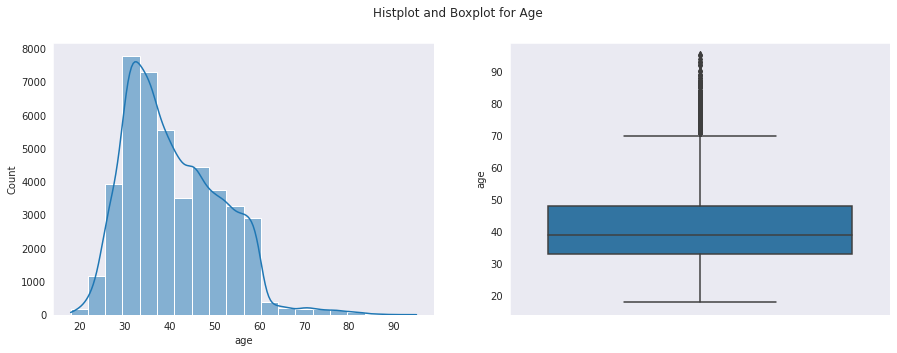

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=df, x="age", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=df, y="age")

The age ranges from 18 years old to 95 years old. Groupping the age by [Beresford Research](https://www.beresfordresearch.com/age-range-by-generation/)'s Age Range by Generation table 

In [ ]:
#Dividing the age into various columns 
def age_bracket(x):
    if x in range(18,26):
        return 'GenZ'
    elif x in range(26,42):
        return 'Millennials'
    elif x in range(42,58):
        return 'Gen X'
    elif x in range(58,68):
        return 'Boomers II' 
    elif x in range(68,77):
        return 'Boomers I'      
    elif x in range(77,94):
        return 'Post War'       
    elif x in range(94,100):
        return 'WWII'

In [ ]:
#Now let us apply this function and create new columns in the dataset.
df['Age_range'] = df['age'].apply(age_bracket)

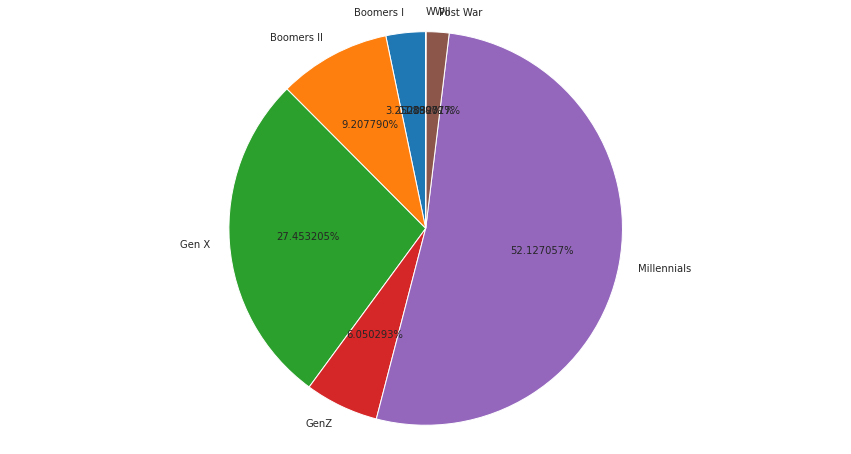

In [ ]:
labels = 'Boomers I', 'Boomers II', 'Gen X', 'GenZ', 'Millennials','Post War', 'WWII'
sizes = [172,  487, 1452,  320, 2757,  100,    1]


fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.pie(sizes, labels=labels, autopct='%0f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
a = df.groupby("Age_range").agg({"y" : "sum"})
b = df.Age_range.value_counts().rename_axis('Generation').reset_index(name='Total_Count')
c= a.merge(b, left_on='Age_range', right_on='Generation')
c['Percetage_yes'] = c.y /  c.Total_Count
c

,y,Generation,Total_Count,Percetage_yes
0,172,Boomers I,405,0.42
1,484,Boomers II,2642,0.18
2,1445,Gen X,15801,0.09
3,320,GenZ,1332,0.24
4,2751,Millennials,24583,0.11
5,98,Post War,224,0.44
6,1,WWII,3,0.33


<Figure size 1296x864 with 0 Axes>

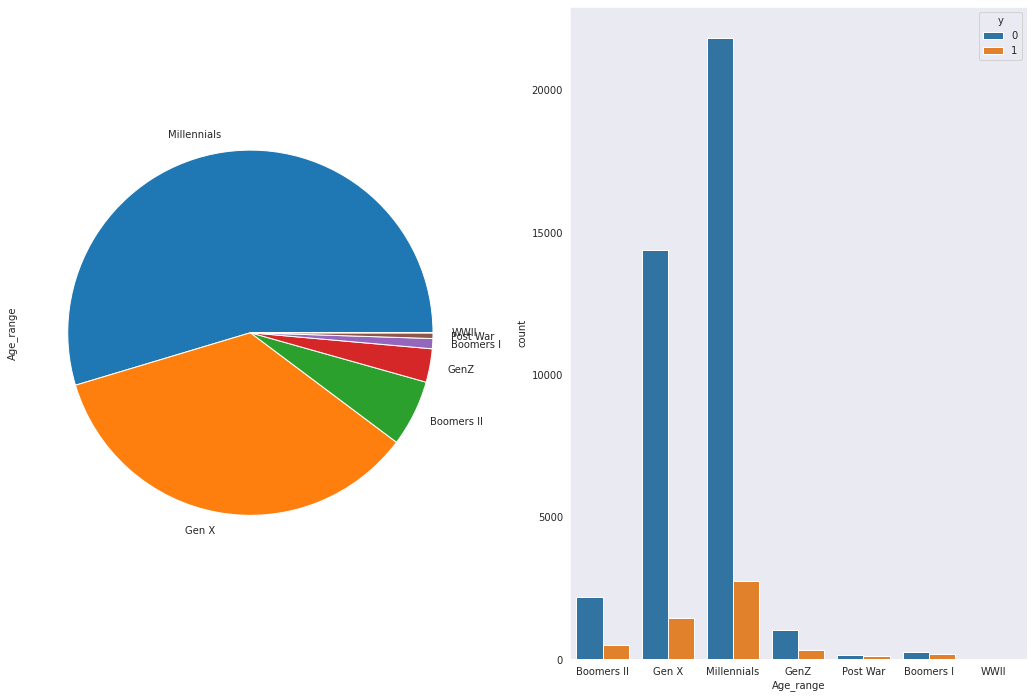

In [ ]:
#plot to determine the relationship between categories
categorical_features  = ['Age_range']
for col in categorical_features:
  plt.figure(figsize=(18,12))
  fig, axes = plt.subplots(ncols=2,figsize=(18,12))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'y', data = df)

### 2.Reducing JOB categories

In [ ]:
#Creating dictionary of different job type
job_dict = {'entrepreneur': 'others', 'unknown':'others', 'retired':'rstd', 'admin.':'adms', 'services':'adms',
            'self-employed':'others','unemployed':'others', 'housemaid':'others', 'student':'rstd', 'management':'management',
            'technician':'technician', 'blue-collar':'blue-collar'}

#creating new column new_job after maping
df['new_job'] = df.job.map(job_dict)

print(df.new_job.nunique())
df.new_job.unique()

6


array(['management', 'technician', 'others', 'blue-collar', 'rstd',
       'adms'], dtype=object)

<Figure size 1296x864 with 0 Axes>

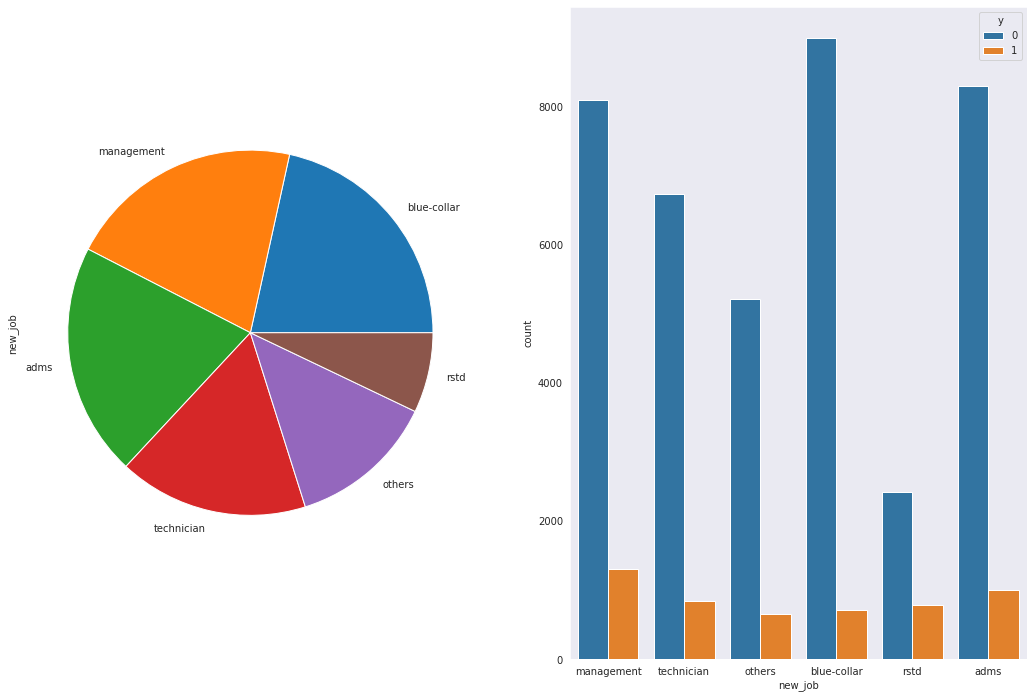

In [ ]:
#plot to determine the relationship between categories
categorical_features  = ['new_job']
for col in categorical_features:
  plt.figure(figsize=(18,12))
  fig, axes = plt.subplots(ncols=2,figsize=(18,12))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'y', data = df)

### 3.Binning Pdays

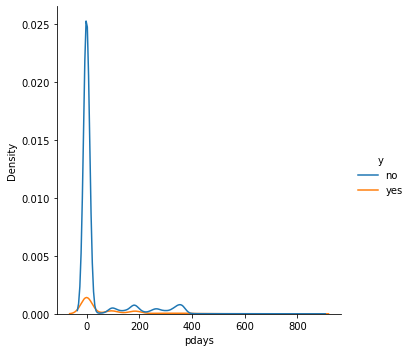

In [31]:
sns.displot(data=df, x="pdays", hue="y", kind="kde")

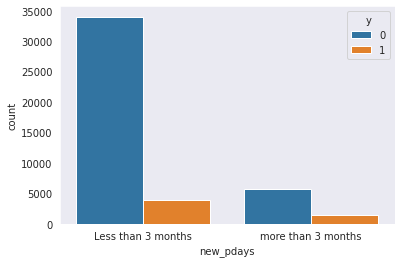

In [ ]:
#PDAYS
# We dividing pdays feature in three parts and convert into categorical feature 
# Creating a function
def replace_pdays_value(pdays):
  '''this function is used to  limit the value within the range'''
  if pdays > 94:   #more than 97 set value more than 3 months
    pdays = 'more than 3 months'
  elif pdays <94:   #below 0 set value Less than 3 months
    pdays = 'Less than 3 months'
  else:
    pdays = 'Less than 3 months'   # others set Less than 3 months
  return pdays

# call function for the pdays and store it into new column new_pdays
df['new_pdays'] = df['pdays'].apply(replace_pdays_value)

#checking change plotting barplot
sns.countplot(df['new_pdays'], hue = df.y)
plt.show()

In [ ]:
df.drop(['pdays','job'],axis=1,inplace = True)
df.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'y', 'Age_range', 'new_job', 'new_pdays'],
      dtype='object')

In [ ]:
# Defining Categories 
categorical_features  = ['new_job', 'marital', 'education', 'contact', 'month','poutcome','Age_range','new_pdays']

#Creating Dummies
df_m=pd.get_dummies(df, columns = categorical_features,drop_first=False)

#Label Encoding 
boolean_columns = ['housing', 'loan', 'default']
for col in  boolean_columns:
    df_m[col+'_new']=df_m[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_m.drop(col, axis=1, inplace=True)

Train test split

In [ ]:
X = df_m.drop(['y'],axis=1)
y = df_m['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)
print(X_train.shape)
print(X_test.shape)

(35992, 50)
(8998, 50)


##C. Multicollinearity Check

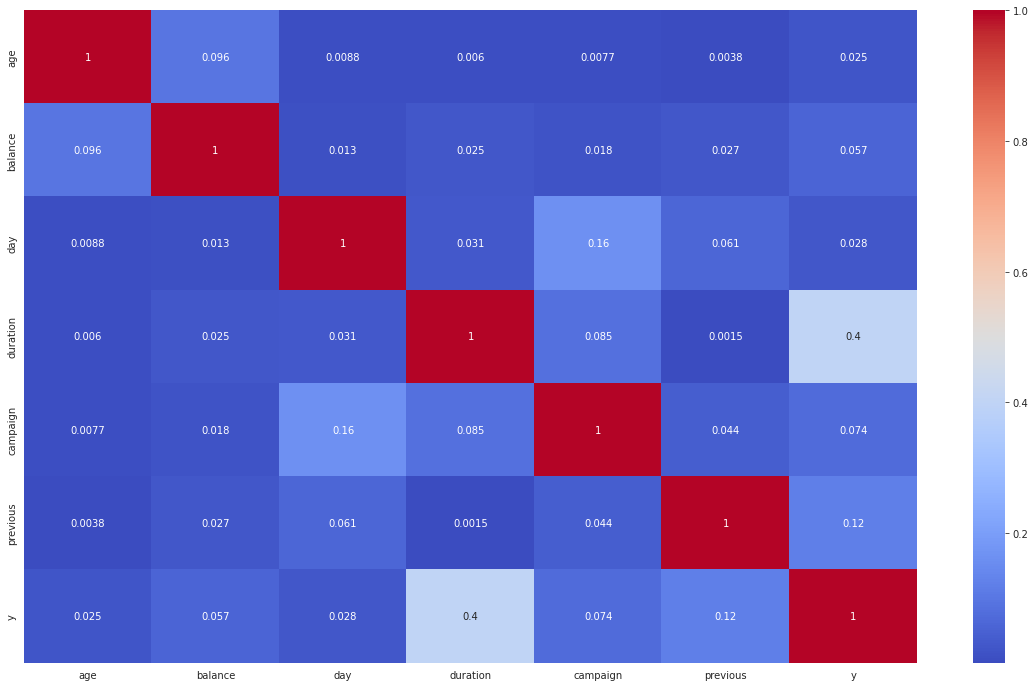

In [ ]:
plt.figure(figsize=(20,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


VIF

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['y']]])

,variables,VIF
0,age,4.99
1,day,4.00
2,duration,1.94
3,campaign,1.89
4,balance,1.26
5,previous,1.10


we see that none of the feature has high coorealtion with the target variable hence we move towards model building

## D. Oversampling using SMOTE
SMOTE(Synthetic Minority Oversampling Technique)
The dataset is imbalanced which can lead to biasness while building the model. To avoid this we use SMOTE.

SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points.

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
y.value_counts()

0    39719
1     5271
Name: y, dtype: int64

In [ ]:
df.shape

(44990, 18)

In [ ]:
print ('original dataset length',len(X))
print ('Resample dataset length',len(X_train_sm))

original dataset length 44990
Resample dataset length 63606


## E. Scaling on Data set

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# **III.** Machine learning models 

## A. Model Building with "Duration" feature

**Model building** 


We will start by building simple classifiers models and work our way upto more complex models. but first lets start by defining some important function's.

In [ ]:
'''Function to fit the model  : fit_modt() '''
def fit_mod(model, X_train, X_test, y_train, y_test):
  '''Takes Classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global modelprediction
  # Fitting the model
  model.fit(X_train, y_train)
  modelprediction = model.predict(X_test)
  model_accuracy = accuracy_score(y_test, modelprediction) 
  #Printing score
  print("Training accuracy Score    : ",model.score(X_train, y_train))
  print("Testing accuracy Score : ",model_accuracy )
  print(classification_report(modelprediction,y_test))

'''
'''
'''Function to plot confu_mat : confu_mat() '''
def confu_mat(model, X_train, X_test, y_train, y_test):
 # Confusion Matrix
 conf_matrix = confusion_matrix(y_test, modelprediction)
 # Markings
 f, ax = plt.subplots(figsize=(10, 6))
 sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
 plt.title("Confusion Matrix", fontsize=15)
 plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
 ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
 ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
 ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
 plt.show()


'''
'''
'''Function to plot Roc_curve : Roc_curve() '''

def Roc_curve(model, X_train, X_test, y_train, y_test):
  # AUC_ROC Curve
  model_probability = model.predict_proba(X_test)[:,1]
  roc_score=roc_auc_score(y_test, model_probability)  
  fpr, tpr, _ = roc_curve(y_test, model_probability)  
  # Markings
  plt.title( 'ROC curve')
  plt.xlabel('FPR (Precision)')
  plt.ylabel('TPR (Recall)')
  plt.plot(fpr,tpr)
  plt.plot((0,1), ls='dashed',color='black')
  plt.show()
  return roc_score,fpr,tpr,model_probability

  '''
  '''
  '''Function to plot feature importance: imp_fe() '''
def imp_fe(model):
    # Plotting Feature Importance
  try:
    features = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
  except:
    features = X.columns
    importances = model.best_estimator_.feature_importances_
    indices = np.argsort(importances)
  # Markings
  plt.figure(figsize=(30,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()


### 1.LogisticRegression

without over sampling 

In [ ]:
#Defining Model 
lr = LogisticRegression(fit_intercept=True, max_iter=10000)

'''Performance Matrics of the model''' 
#Fitting model 
fit_mod(lr, X_train, X_test, y_train, y_test)

Training accuracy Score    :  0.9019504334296511
Testing accuracy Score :  0.8897532785063348
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      8832
           1       0.12      0.77      0.21       166

    accuracy                           0.89      8998
   macro avg       0.56      0.83      0.57      8998
weighted avg       0.98      0.89      0.93      8998



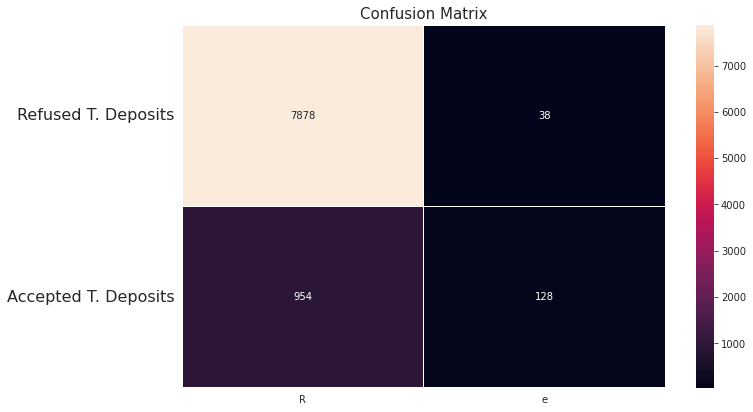

In [ ]:
confu_mat(lr, X_train, X_test, y_train, y_test)

with over sampling

In [ ]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)

fit_mod(lr, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9440147155928686
Testing accuracy Score :  0.9014225383418537
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8409
           1       0.36      0.67      0.47       589

    accuracy                           0.90      8998
   macro avg       0.67      0.79      0.71      8998
weighted avg       0.93      0.90      0.91      8998



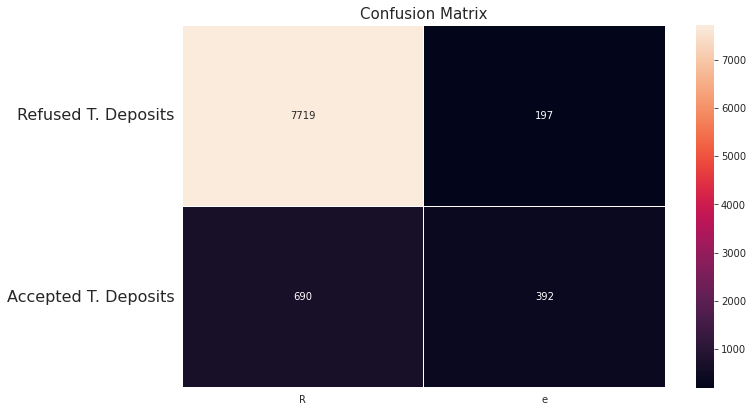

In [ ]:
confu_mat(lr, X_train_sm, X_test, y_train_sm, y_test)

with hyper parameter tuning 

In [ ]:
#Parameter Grid
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

'''Using Grid Search cv to find the best parameters ''' 
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3,error_score="raise",)

#Fitting model 
'''Performance Matrics of the model''' 
fit_mod(grid_lr, X_train_sm, X_test, y_train_sm, y_test)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Training accuracy Score    :  0.9364682577115366
Testing accuracy Score :  0.8974216492553901
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8551
           1       0.28      0.68      0.40       447

    accuracy                           0.90      8998
   macro avg       0.63      0.79      0.67      8998
weighted avg       0.95      0.90      0.92      8998



In [ ]:
'''Best Estimator'''
grid_lr.best_estimator_
''' Best Parameters''' 
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

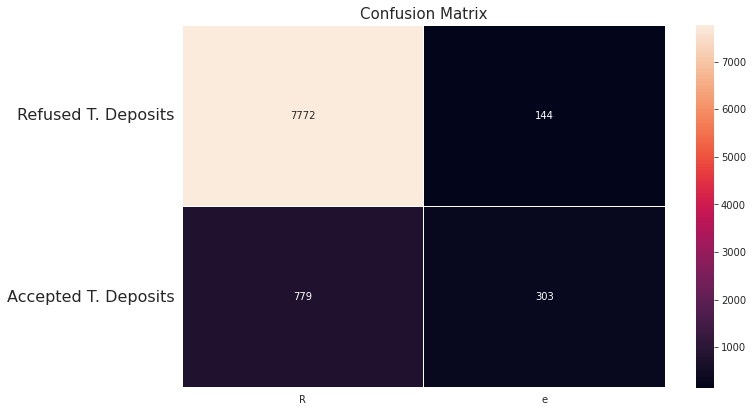

In [ ]:
confu_mat(grid_lr, X_train_sm, X_test, y_train_sm, y_test)

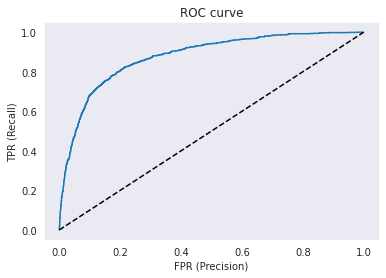

0.8766508832575686

In [ ]:
roc_score_lr,lr_fpr,lr_tpr,lr_probability = Roc_curve(grid_lr, X_train_sm, X_test, y_train_sm, y_test)
roc_score_lr

### 2.Decision Tree Classifier

With oversampling data

In [ ]:
# Defining model 
dt = DecisionTreeClassifier() # model 
#Fitting model 
fit_mod(dt, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8719715492331629
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7854
           1       0.50      0.47      0.48      1144

    accuracy                           0.87      8998
   macro avg       0.71      0.70      0.70      8998
weighted avg       0.87      0.87      0.87      8998



'Performance Matrics of the model'

we observe that the data is overfitting as the model is performing very well on training data set and not on testing data set.

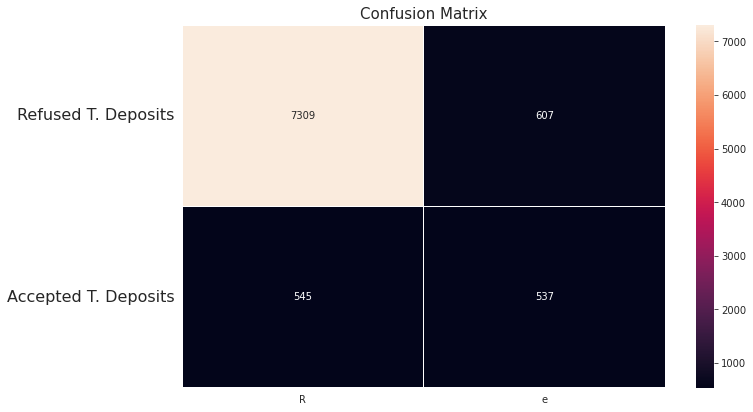

In [ ]:
confu_mat(dt, X_train_sm, X_test, y_train_sm, y_test)

With hyper parameters tuning 

In [ ]:
'''Parameter Grid''' 
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.01,0.05,0.1]}

'''Using grid Search CV to find the best Paramaeters''' 
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)

#Fitting model 
fit_mod(dt_grid, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training accuracy Score    :  0.9140804326635852
Testing accuracy Score :  0.8885307846188042
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7769
           1       0.60      0.53      0.57      1229

    accuracy                           0.89      8998
   macro avg       0.77      0.74      0.75      8998
weighted avg       0.88      0.89      0.89      8998



'Performance Matrics of the model'

In [ ]:
dt_grid.best_params_

{'max_depth': 20, 'min_samples_split': 0.01}

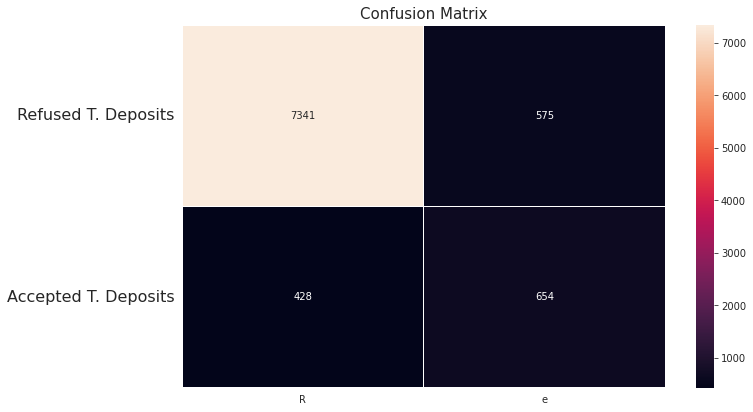

In [ ]:
confu_mat(dt_grid, X_train_sm, X_test, y_train_sm, y_test)

ROC AOC Curve for Decision Tree Classifier

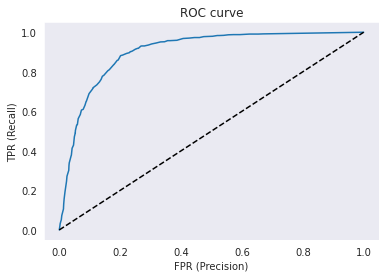

0.901088975835926

In [ ]:
roc_score_dt,dt_fpr,dt_tpr,dt_probability = Roc_curve(dt_grid, X_train_sm, X_test, y_train_sm, y_test)
roc_score_dt

### 3.Random Forest Classifier


with oversampled data 

In [ ]:
# Defining model 
rfc = RandomForestClassifier()
'''Fitting model ''' 
fit_mod(rfc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 

Training accuracy Score    :  1.0
Testing accuracy Score :  0.9035341186930429
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8288
           1       0.43      0.65      0.52       710

    accuracy                           0.90      8998
   macro avg       0.70      0.79      0.73      8998
weighted avg       0.93      0.90      0.91      8998



'Performance Matrics of the model'

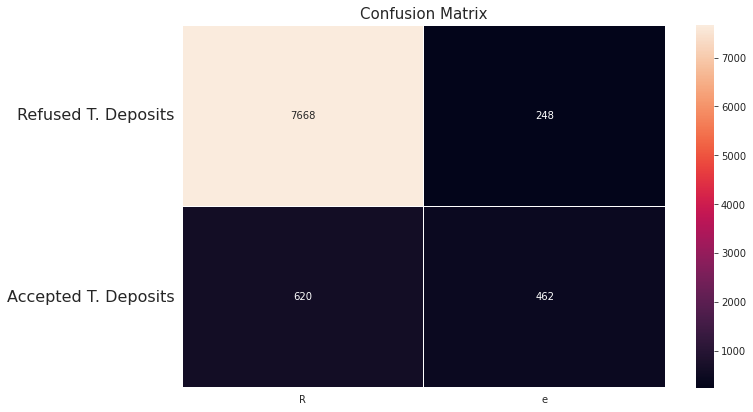

In [ ]:
confu_mat(rfc, X_train_sm, X_test, y_train_sm, y_test)

with hyper parameter tuning 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  16.2s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  15.4s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  15.4s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  15.3s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  15.3s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   8.4s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   8.6s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   8.6s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   9.5s
[CV] END

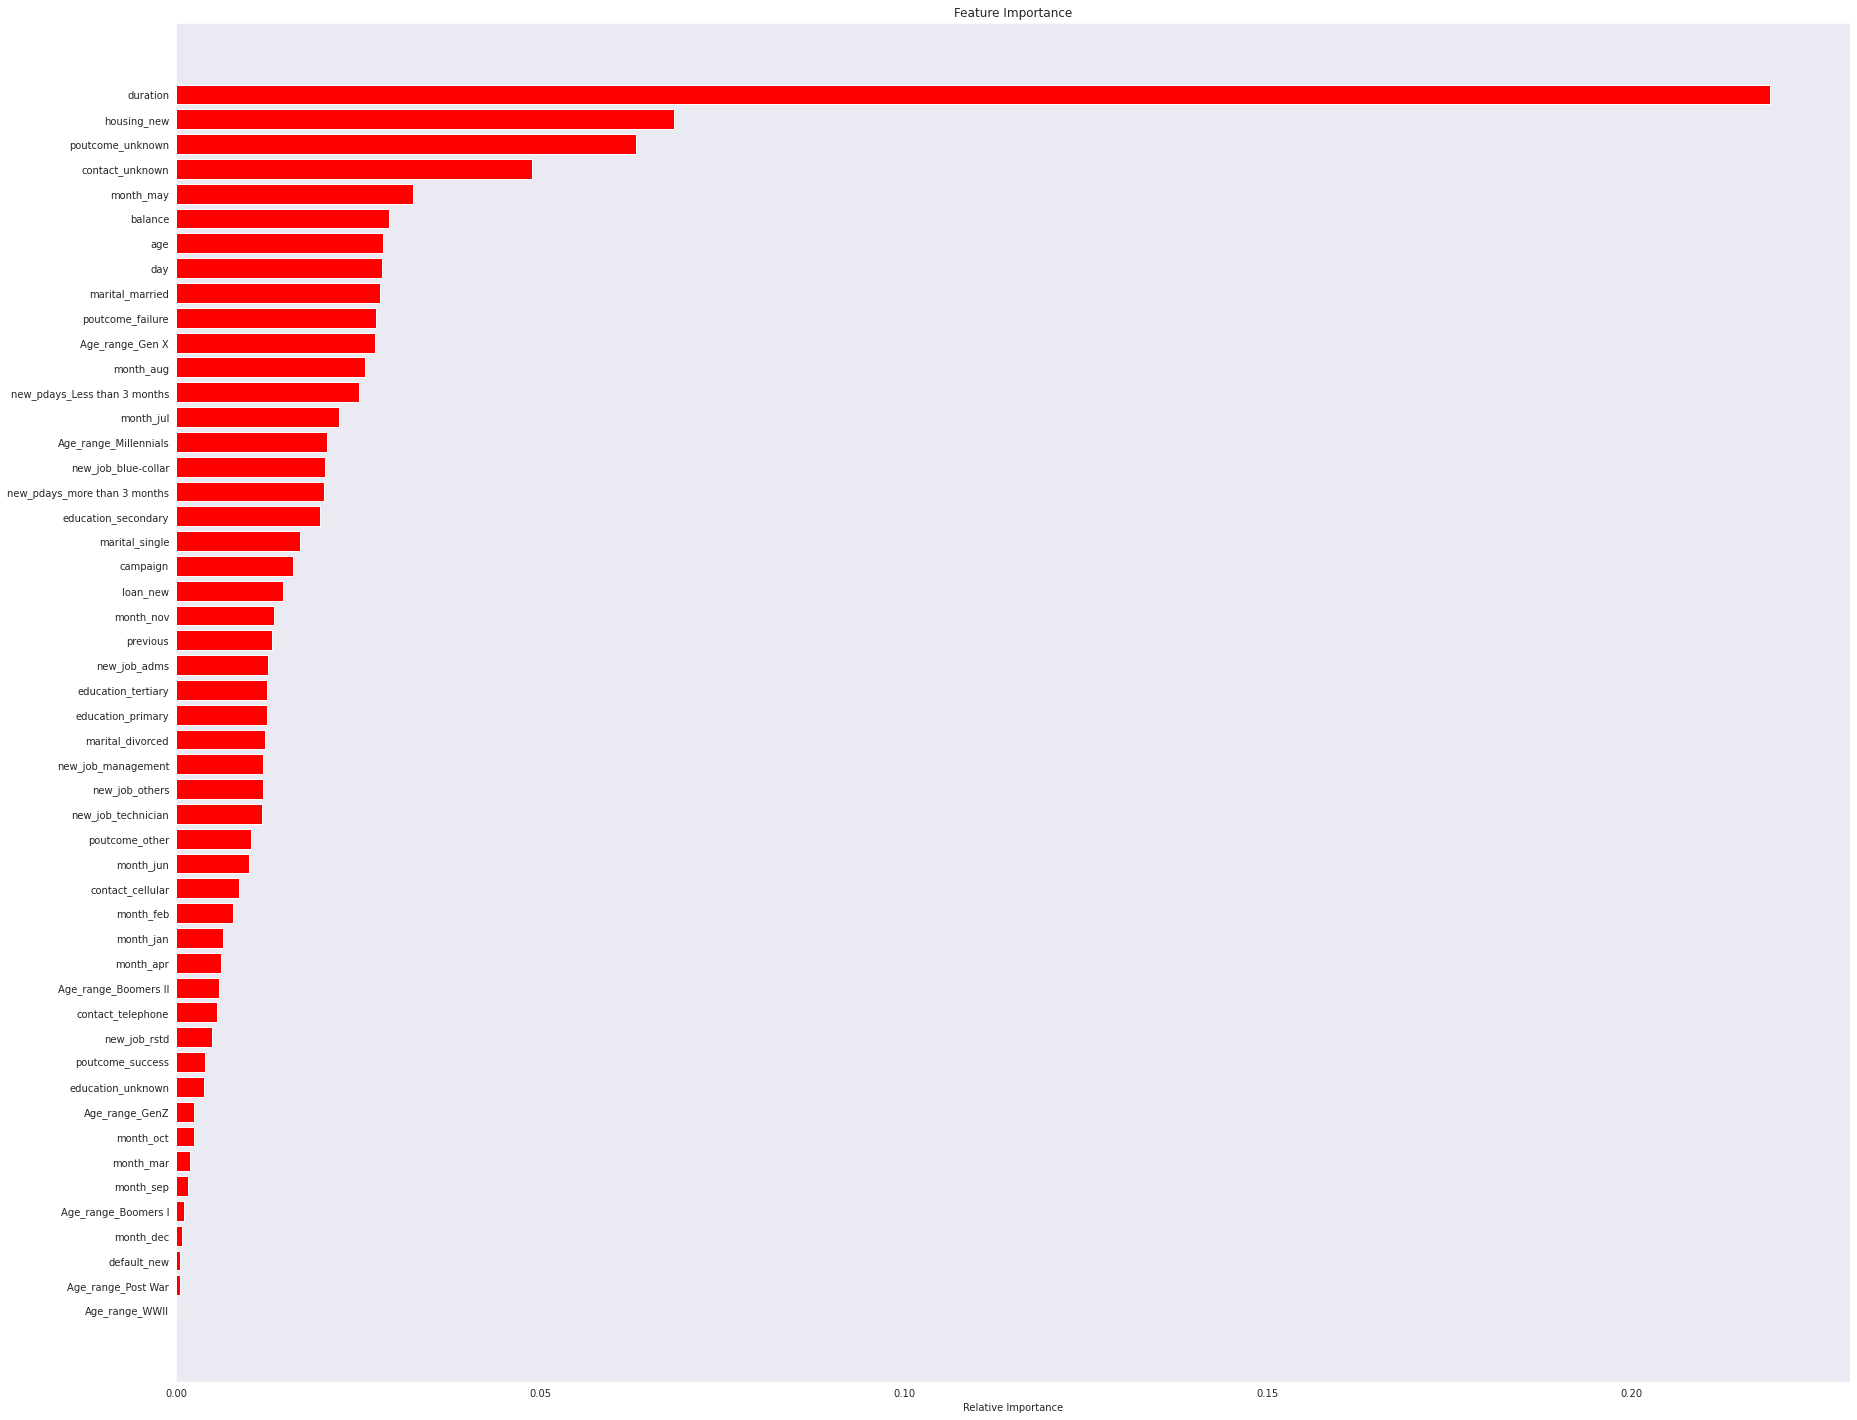

In [ ]:
'''Parameter Grid''' 
param_dict={'max_depth': [20],
            'min_samples_leaf': [0.01,0.1,1,5],
            'min_samples_split': [ 0.01,2,5,10],
            'n_estimators': [500]}

'''implementating RandomizedSearchCV to find the best parameters''' 
rfc_grid = RandomizedSearchCV(estimator=rfc,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc',n_iter=5,random_state=0)

#Fitting model 
fit_mod(rfc_grid, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 
''''''
'''''' 
# important features 
'''Important Feature for XG Boost Classifier'''
imp_fe(rfc_grid)

In [ ]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

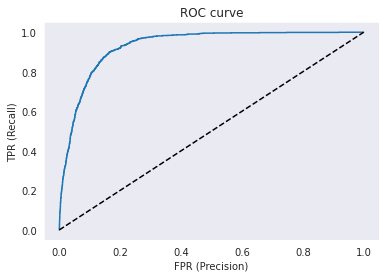

0.9308174837643688

In [ ]:
roc_score_rfc,rfc_fpr,rfc_tpr,rfc_probability = Roc_curve(rfc_grid, X_train_sm, X_test, y_train_sm, y_test)
roc_score_rfc

### 4.Gradient Boosting Classifier

with over sampled data 

In [ ]:
# Defining Model 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

'''Fitting model ''' 
fit_mod(gbc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 

Training accuracy Score    :  0.9417979435902273
Testing accuracy Score :  0.9007557234941098
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8223
           1       0.45      0.62      0.52       775

    accuracy                           0.90      8998
   macro avg       0.70      0.77      0.73      8998
weighted avg       0.92      0.90      0.91      8998



'Performance Matrics of the model'

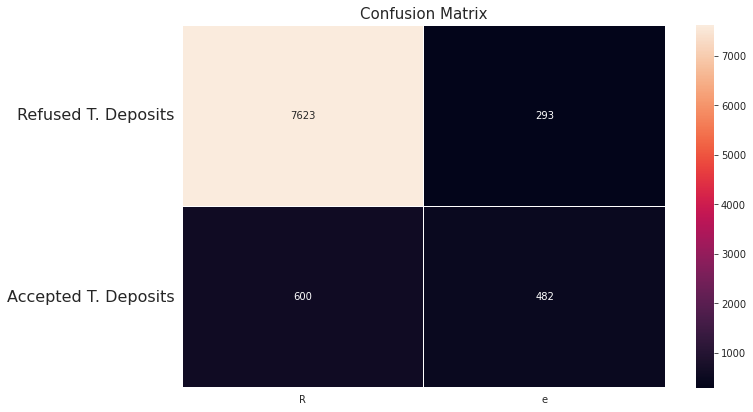

In [ ]:
confu_mat(gbc, X_train_sm, X_test, y_train_sm, y_test)

With hyper parameter tuning 

Training accuracy Score    :  0.9720781058390718
Testing accuracy Score :  0.9085352300511225
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8069
           1       0.55      0.64      0.59       929

    accuracy                           0.91      8998
   macro avg       0.75      0.79      0.77      8998
weighted avg       0.92      0.91      0.91      8998



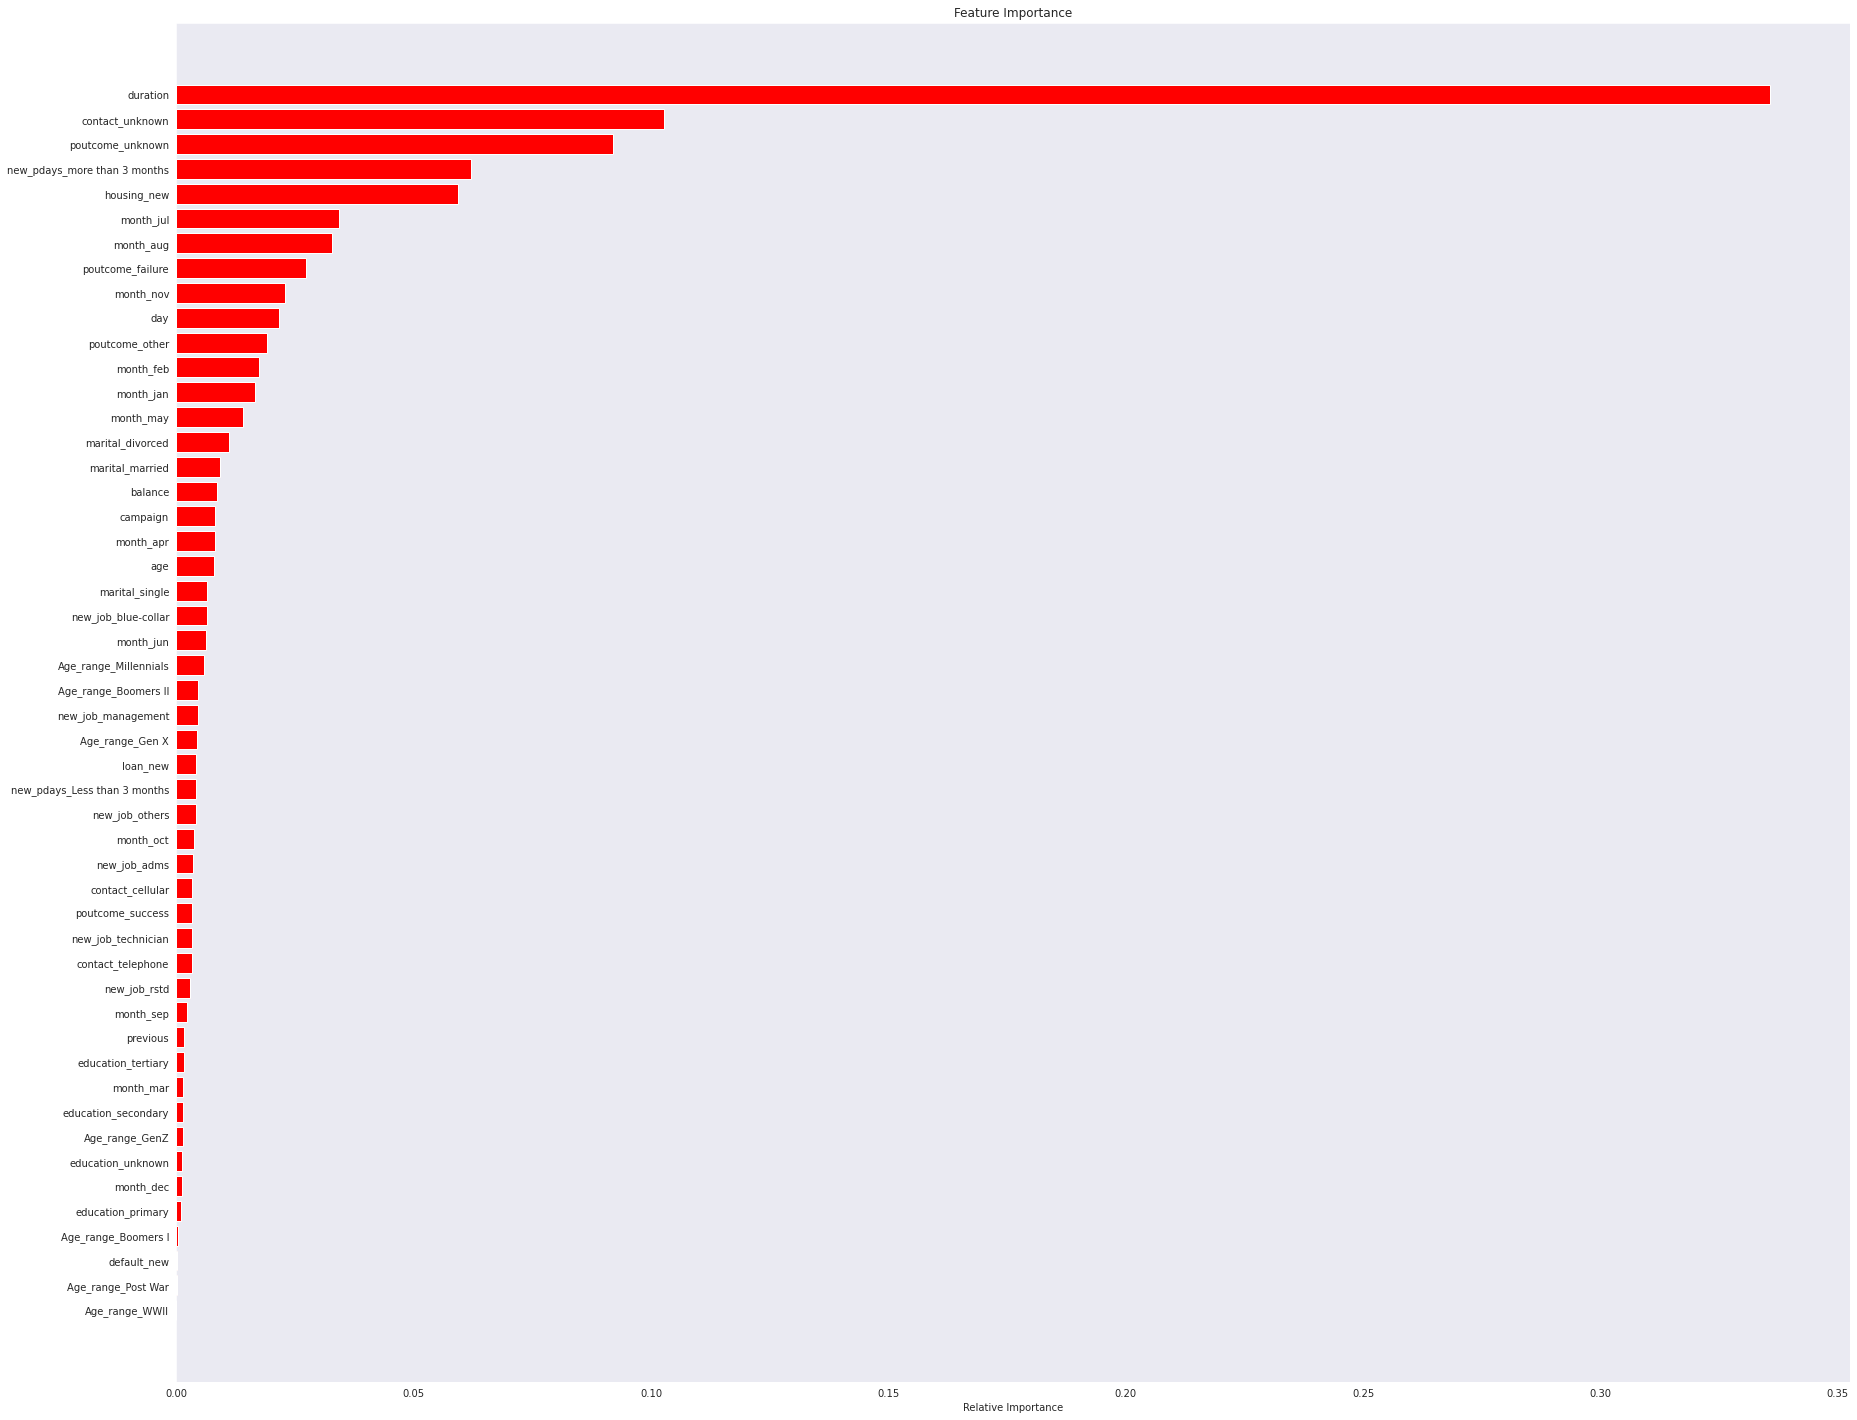

In [ ]:
#Parameter Grid
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

#Defining model
gbc = GradientBoostingClassifier( random_state=0)

'''Implementing GridSearch CV to find the best parameters'''
gb_grid= GridSearchCV(gbc,param_grid=params,verbose=0,cv=3)

#Fitting model
fit_mod(gb_grid, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 
''''''
'''''' 
# important features 
'''Important Feature for XG Boost Classifier'''
imp_fe(gb_grid)

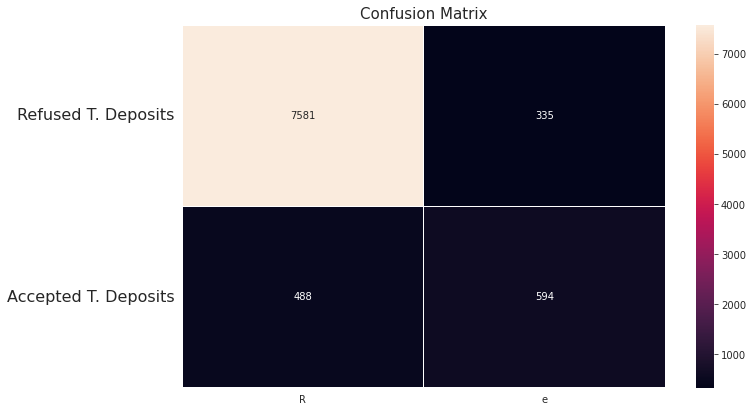

In [ ]:
confu_mat(gb_grid, X_train_sm, X_test, y_train_sm, y_test)

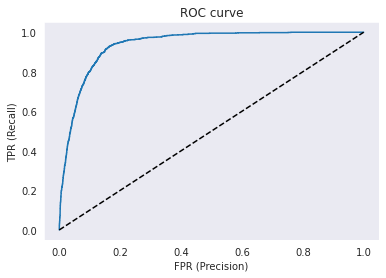

0.9372122629569817

In [ ]:
gb_score_gb,gb_fpr,gb_tpr,gb_probability = Roc_curve(gb_grid, X_train_sm, X_test, y_train_sm, y_test)
gb_score_gb

### 5.K Neighbors Classifier

With over sampled data 

In [ ]:
#Defining model
knc = KNeighborsClassifier()

#Fitting model 
fit_mod(knc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 

Training accuracy Score    :  0.951042354494859
Testing accuracy Score :  0.8895310068904201
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8396
           1       0.32      0.57      0.41       602

    accuracy                           0.89      8998
   macro avg       0.64      0.74      0.67      8998
weighted avg       0.92      0.89      0.90      8998



'Performance Matrics of the model'

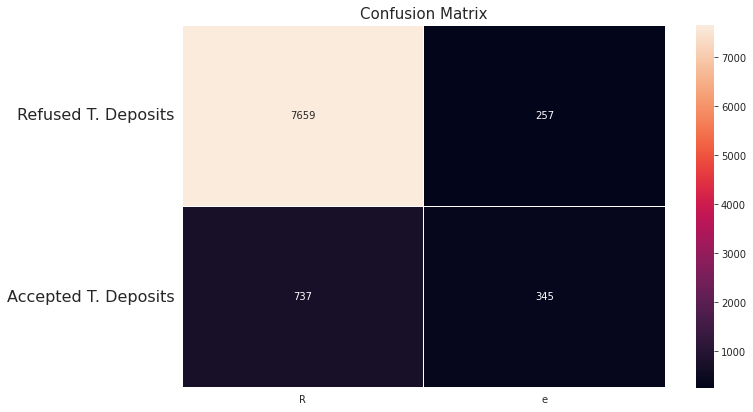

In [ ]:
confu_mat(knc, X_train_sm, X_test, y_train_sm, y_test)

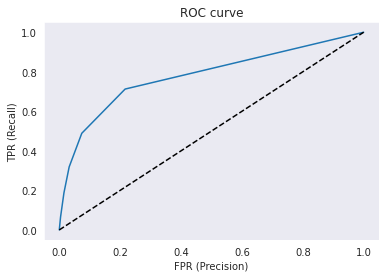

0.7792523320185423

In [ ]:
roc_score_knc,knc_fpr,knc_tpr,knc_probability = Roc_curve(knc, X_train_sm, X_test, y_train_sm, y_test)
roc_score_knc

With hyper parameter tuning 

One of the challenges in a k-NN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.
for details into Hyperparameter Tuning [click here](https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning) 

In [ ]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_sm,y_train_sm)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.86941543, 0.88541898, 0.88541898, 0.88775283, 0.88953101,
       0.88953101, 0.88986441, 0.88841965, 0.88786397, 0.88819738,
       0.88786397, 0.88786397, 0.88719715, 0.88775283, 0.88719715,
       0.88719715, 0.88708602, 0.88741943, 0.88664148, 0.88686375])

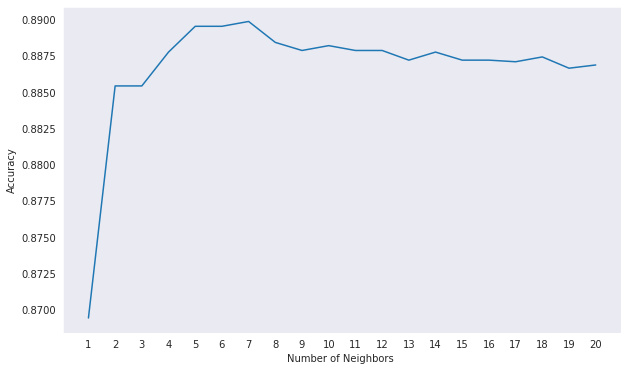

In [ ]:
'''finding the best 'k' i.e. the number of neighbors to be used in the majority vote '''

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity.

In [ ]:
#Defining Model 
knc = KNeighborsClassifier()

#Parameter Grid
grid_params = { 'n_neighbors' : [2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

'''Implementing grid Search CV to find the best model '''
knc_grid = GridSearchCV(knc, grid_params, verbose = 1, cv=3, n_jobs = -1)

#Fitting model 
fit_mod(knc_grid, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Training accuracy Score    :  0.9586988648869603
Testing accuracy Score :  0.8853078461880418
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8658
           1       0.18      0.57      0.27       340

    accuracy                           0.89      8998
   macro avg       0.58      0.74      0.61      8998
weighted avg       0.95      0.89      0.91      8998



'Performance Matrics of the model'

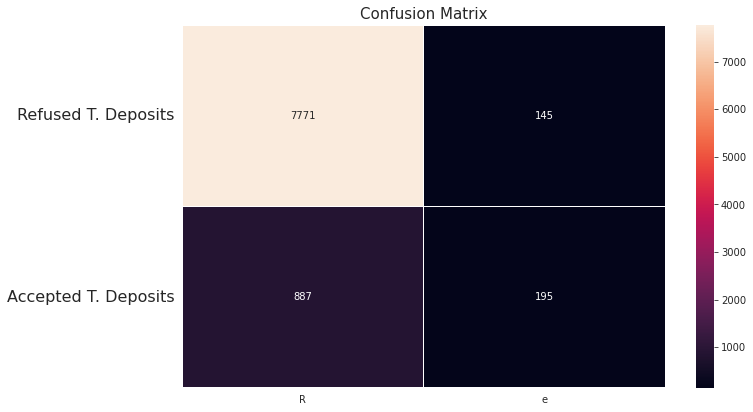

In [ ]:
confu_mat(knc_grid, X_train_sm, X_test, y_train_sm, y_test)

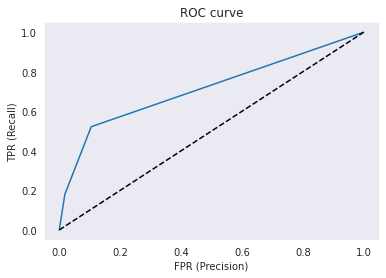

0.7132790557788384

In [ ]:
roc_score_knc,knc_fpr,knc_tpr,knc_probability = Roc_curve(knc_grid,X_train_sm, X_test, y_train_sm, y_test)
roc_score_knc

### 6.XGB Classifier

In [ ]:
#Defining Model
xgbc = xgb.XGBClassifier()

#Fitting model
fit_mod(xgbc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model''' 

Training accuracy Score    :  0.9441404898908908
Testing accuracy Score :  0.9057568348521894
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8006
           1       0.57      0.62      0.59       992

    accuracy                           0.91      8998
   macro avg       0.76      0.78      0.77      8998
weighted avg       0.91      0.91      0.91      8998



'Performance Matrics of the model'

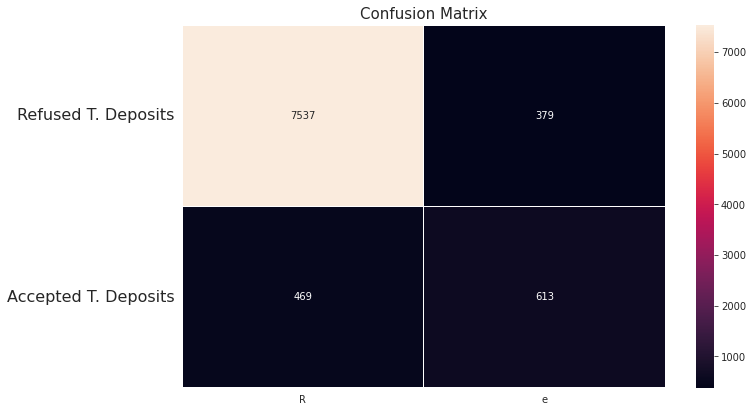

In [ ]:
confu_mat(xgbc, X_train_sm, X_test, y_train_sm, y_test)

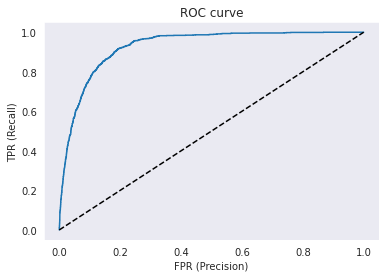

In [ ]:
roc_score_xgb,xgb_fpr,xgb_tpr,Xgb_probability = Roc_curve(xgbc, X_train_sm, X_test, y_train_sm, y_test)

With  Hyperparameter Tuning
for more info [click](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#3.-Basic-Setup-)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training accuracy Score    :  0.9995617841615503
Testing accuracy Score :  0.9034229828850856
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8161
           1       0.49      0.63      0.55       837

    accuracy                           0.90      8998
   macro avg       0.72      0.78      0.75      8998
weighted avg       0.92      0.90      0.91      8998



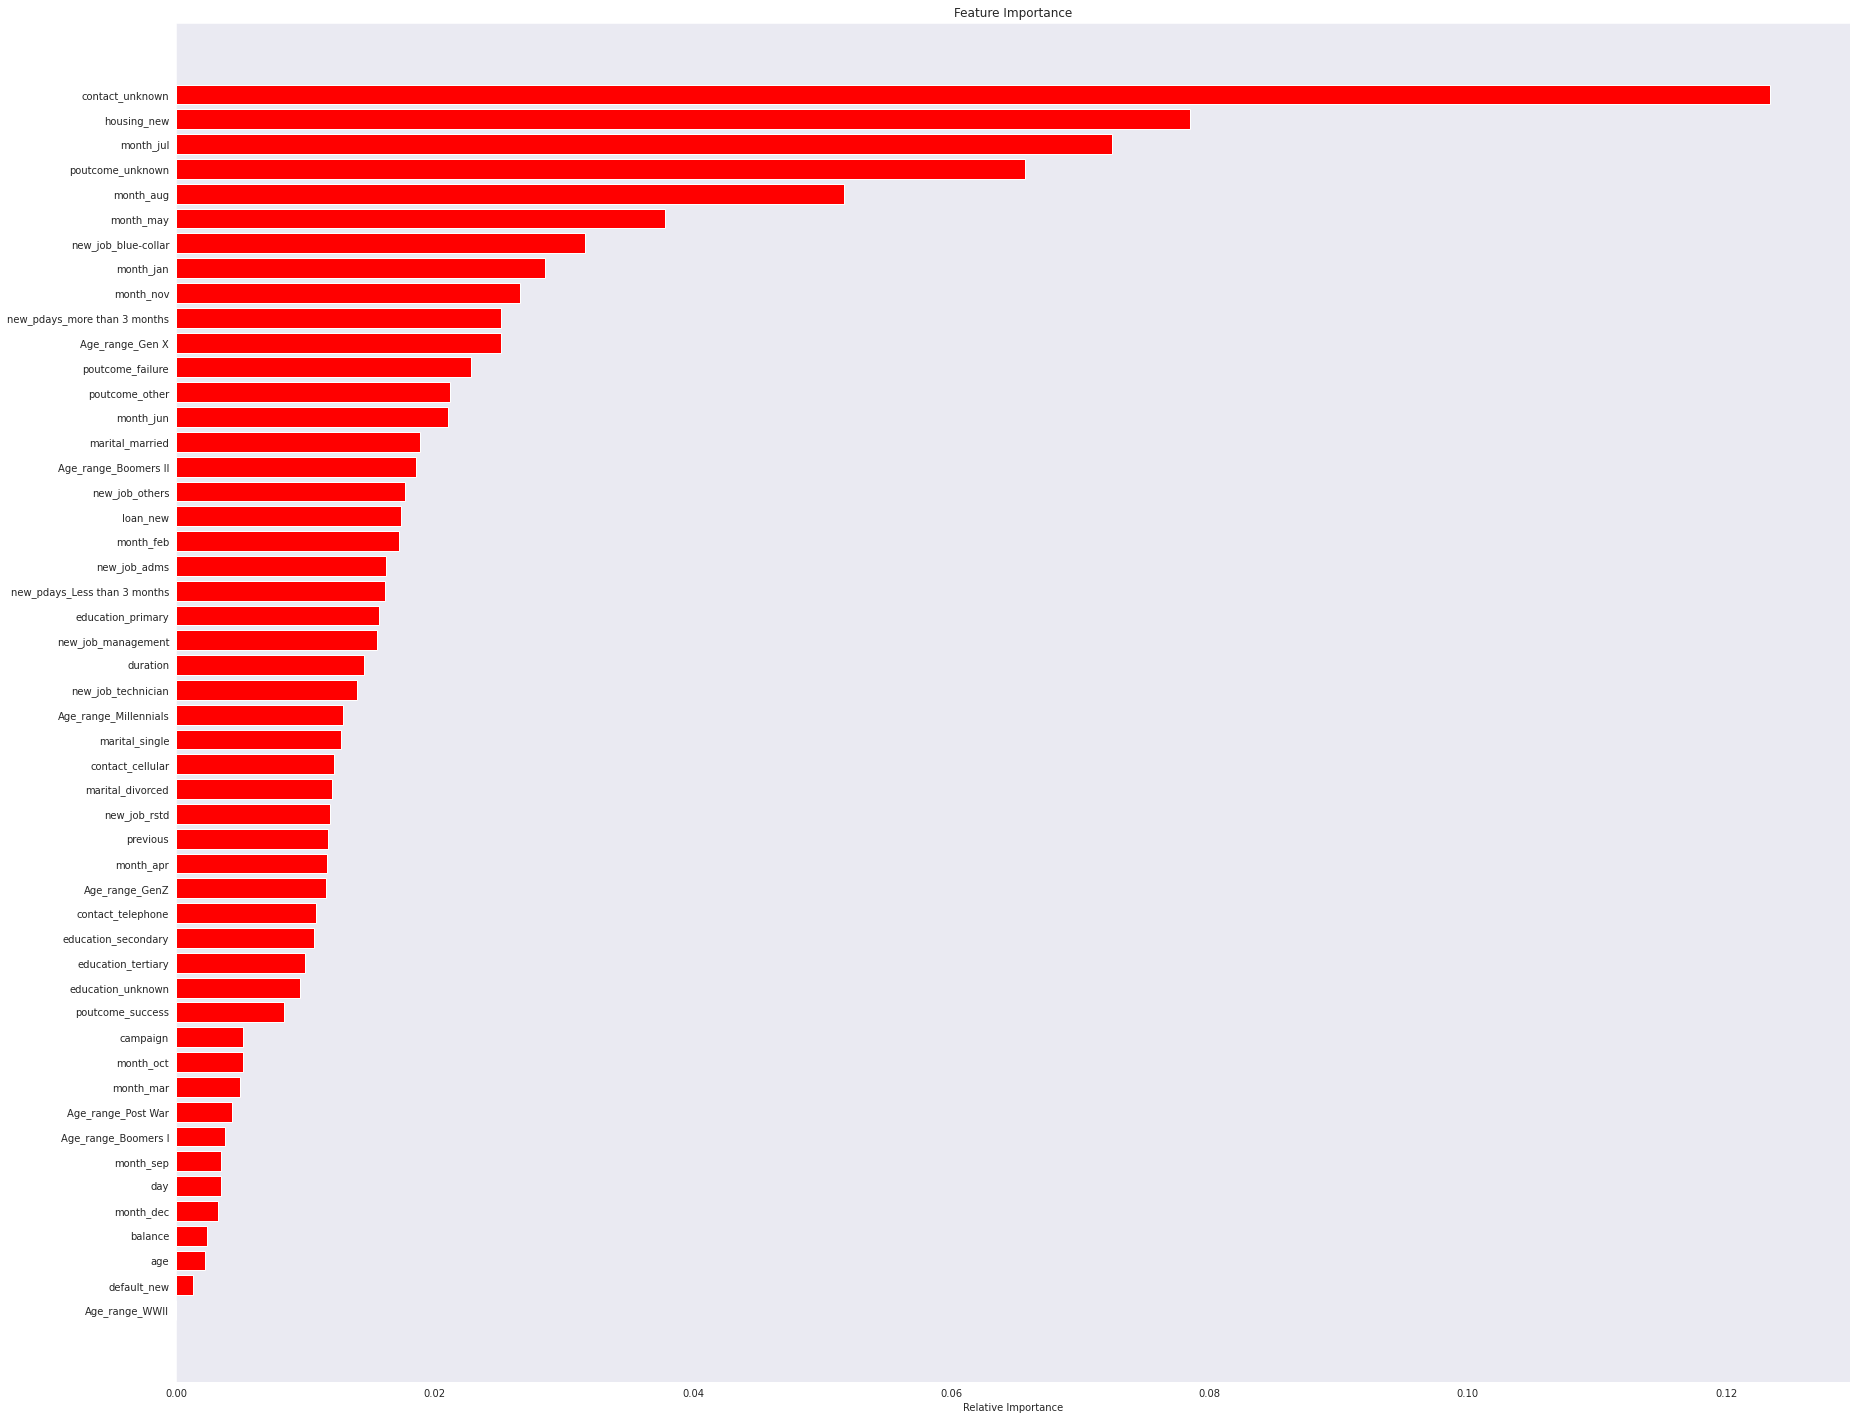

In [ ]:
#Parameter Grid
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
       }
#implementing Random Search CV
xgbc_grid=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#Fitting model 
fit_mod(xgbc_grid, X_train_sm, X_test, y_train_sm, y_test)     
'''Performance Matrics of the model'''  
''''''
'''''' 
# important features 
'''Important Feature for XG Boost Classifier'''
imp_fe(xgbc_grid)

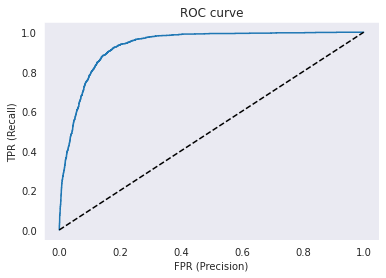

In [ ]:
roc_score_xgb,xgb_fpr,xgb_tpr,Xgb_probability = Roc_curve(xgbc_grid, X_train_sm, X_test, y_train_sm, y_test)

Important Feature for XG Boost Classifier

### 7.Naive Byes Classifier

In [ ]:
# Defining Model
nbc = MultinomialNB()

#Fitting model  
fit_mod(nbc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model'''  

Training accuracy Score    :  0.849699713863472
Testing accuracy Score :  0.8119582129362081
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7232
           1       0.53      0.33      0.41      1766

    accuracy                           0.81      8998
   macro avg       0.69      0.63      0.65      8998
weighted avg       0.79      0.81      0.79      8998



'Performance Matrics of the model'

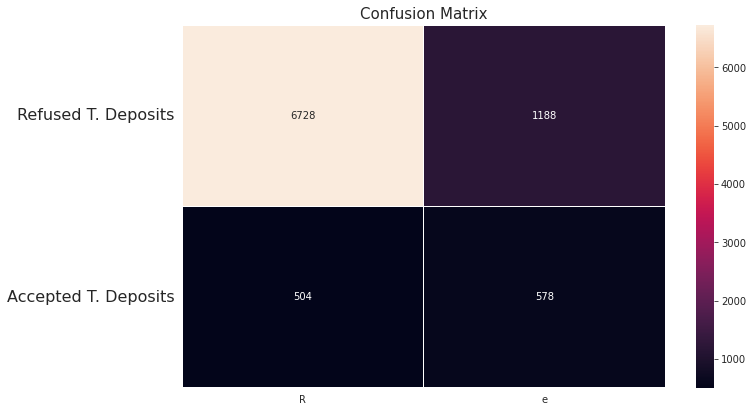

In [ ]:
confu_mat(nbc, X_train_sm, X_test, y_train_sm, y_test)

ROC AOC Curve for Naive Byes Classifier



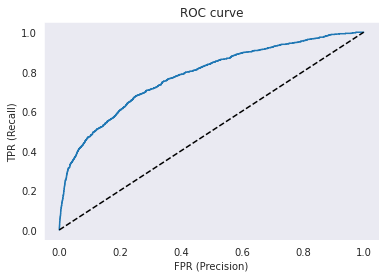

In [ ]:
roc_score_nbc , nbc_fpr , nbc_tpr , nbc_probability = Roc_curve(nbc, X_train_sm, X_test, y_train_sm, y_test)

### 8.Comparision of different classifiers 

In [ ]:
#roc_auc_score for different classifiers
from sklearn.metrics import roc_auc_score
print('logistic regression Classifier Score: ',  roc_auc_score(y_test, lr_probability))
print('Decision tree Classifier Score: ',        roc_auc_score(y_test, dt_probability))
print('Random Forest Classifier: ',              roc_auc_score(y_test, rfc_probability))
print('Gradient Boosting Classifier Score: ',    roc_auc_score(y_test, gb_probability))
print('knn Classifier Score: ',                  roc_auc_score(y_test, knc_probability))
print('XGB Classifier: ',                        roc_auc_score(y_test, Xgb_probability))
print('naive bayes classifer: ',                 roc_auc_score(y_test, nbc_probability))

logistic regression Classifier Score:  0.8766508832575686
Decision tree Classifier Score:  0.901088975835926
Random Forest Classifier:  0.9308174837643688
Gradient Boosting Classifier Score:  0.9372122629569817
knn Classifier Score:  0.7132790557788384
XGB Classifier:  0.9319308375652298
naive bayes classifer:  0.7793745137249811


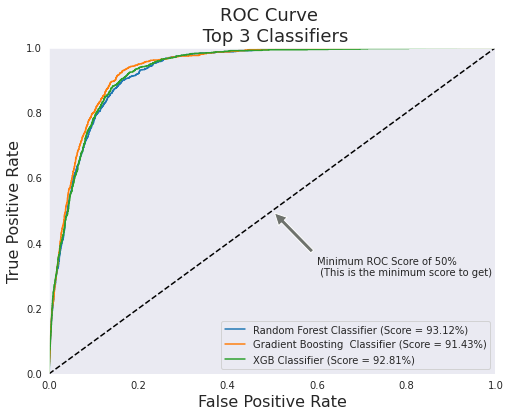

In [ ]:
#roc curves
def graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (Score = 93.12%)')
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting  Classifier (Score = 91.43%)')
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier (Score = 92.81%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr)
plt.show()

##B. Model Building without including "Duration" feature 

Here, we will use random forest and gradient decent and Random Foresst as they provided us with the best results.

In [ ]:
X = df_m.drop(['y','duration'],axis=1)
y = df_m['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)
print(X_train.shape)
print(X_test.shape)

(35992, 49)
(8998, 49)


In [ ]:
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

### 1.Random Forest Classifier

In [ ]:
#Fitting model 
fit_mod(rfc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model'''  

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8888641920426762
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8480
           1       0.28      0.58      0.38       518

    accuracy                           0.89      8998
   macro avg       0.62      0.74      0.66      8998
weighted avg       0.93      0.89      0.91      8998



'Performance Matrics of the model'

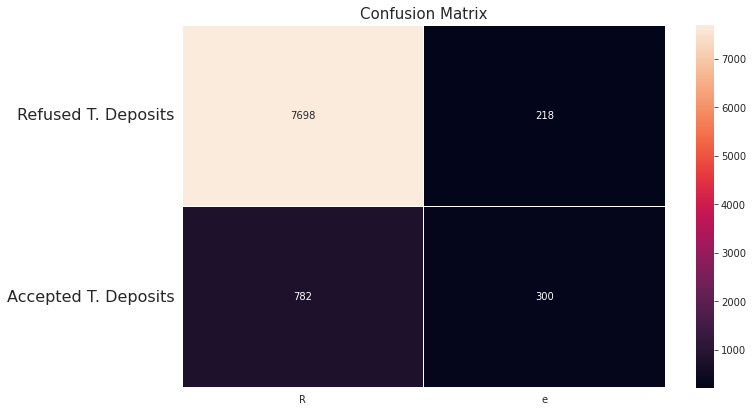

In [ ]:
confu_mat(rfc, X_train_sm, X_test, y_train_sm, y_test)

With Hyperparameter Tuning

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=10, n_estimators=500; total time=   7.1s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=10, n_estimators=500; total time=   7.2s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=10, n_estimators=500; total time=   7.3s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=10, n_estimators=500; total time=   7.3s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=10, n_estimators=500; total time=   8.5s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   7.1s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   7.3s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   7.1s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   7.2s
[CV] END

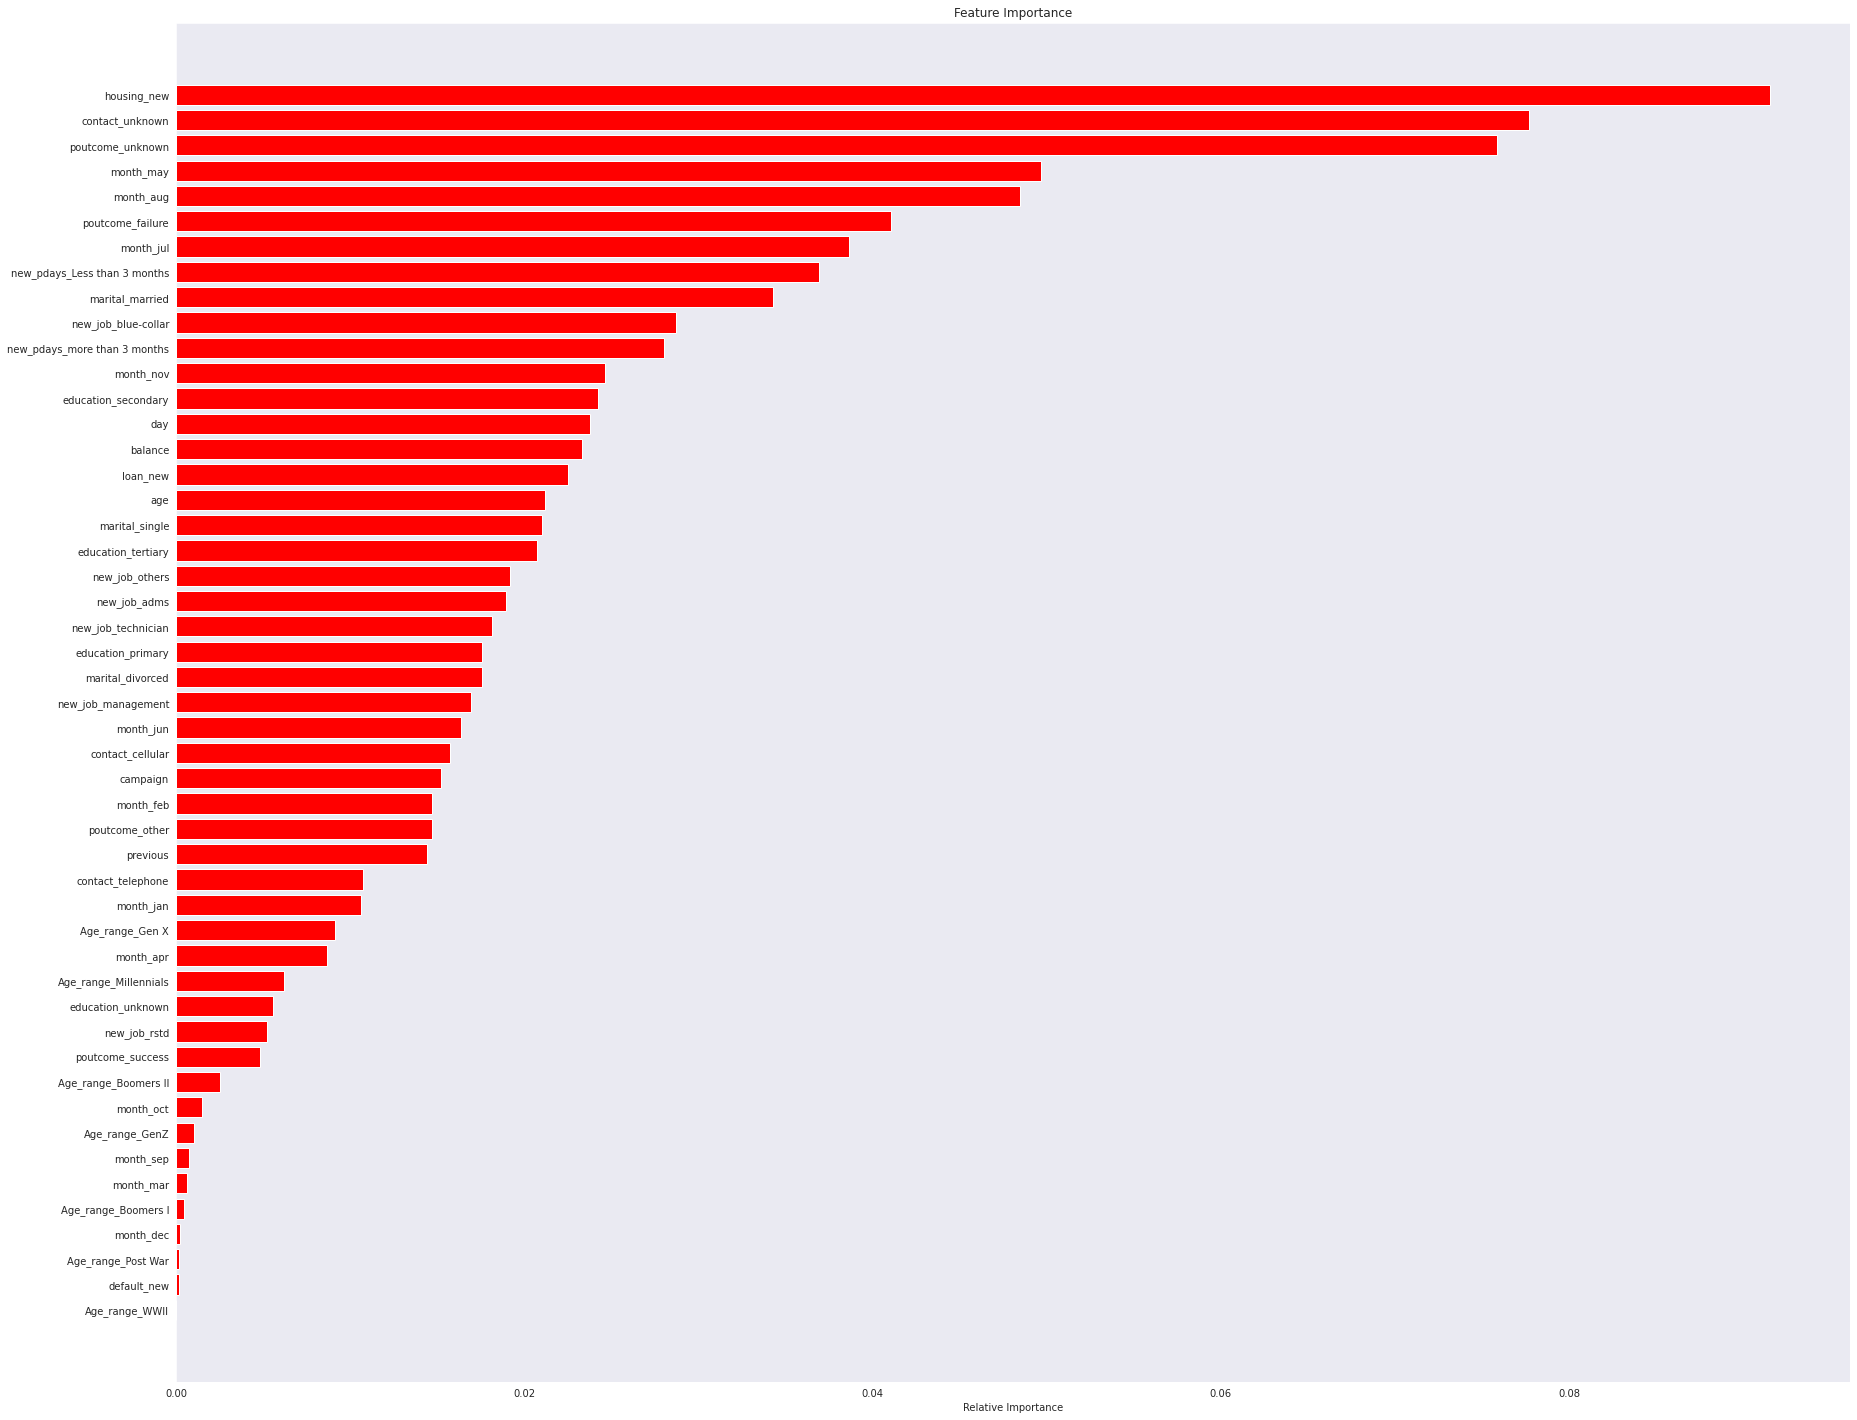

In [ ]:
#Hyperparameter Grid
param_dict={'max_depth': [20],
            'min_samples_leaf': [0.01,0.1,1,5],
            'min_samples_split': [ 0.01,0.2,0.4,2,5,10],
            'n_estimators': [500]}

'''Implementing Random Search CV''' 
rfc_grid = RandomizedSearchCV(estimator=rfc,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc',n_iter=5,random_state=0)

#Fitting model 
fit_mod(rfc_grid, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model'''  
''''''
'''''' 
# important features 
'''Important Feature for XG Boost Classifier'''
imp_fe(rfc_grid)

In [ ]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 500}

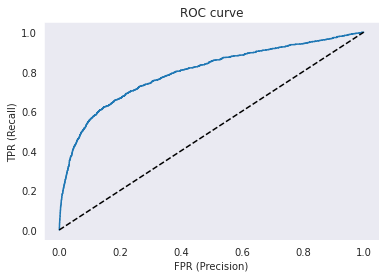

0.7965420650658159

In [ ]:
roc_score_rfc,rfc_fpr,rfc_tpr,rfc_probability = Roc_curve(rfc_grid, X_train_sm, X_test, y_train_sm, y_test)
roc_score_rfc

### 2.XGB Classifier 

In [ ]:
#Fitting model 
fit_mod(xgbc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model'''  

Training accuracy Score    :  0.9293777316605352
Testing accuracy Score :  0.8913091798177373
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8294
           1       0.37      0.57      0.45       704

    accuracy                           0.89      8998
   macro avg       0.67      0.75      0.70      8998
weighted avg       0.92      0.89      0.90      8998



'Performance Matrics of the model'

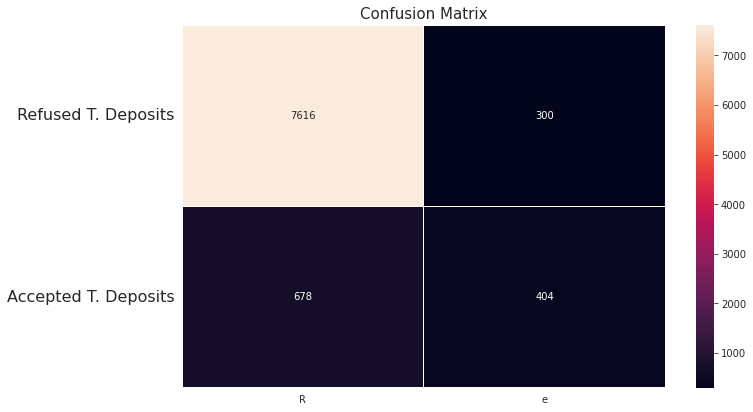

In [ ]:
confu_mat(xgbc, X_train_sm, X_test, y_train_sm, y_test)

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training accuracy Score    :  0.9962989015494782
Testing accuracy Score :  0.8927539453211825
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8463
           1       0.30      0.61      0.40       535

    accuracy                           0.89      8998
   macro avg       0.64      0.76      0.67      8998
weighted avg       0.93      0.89      0.91      8998



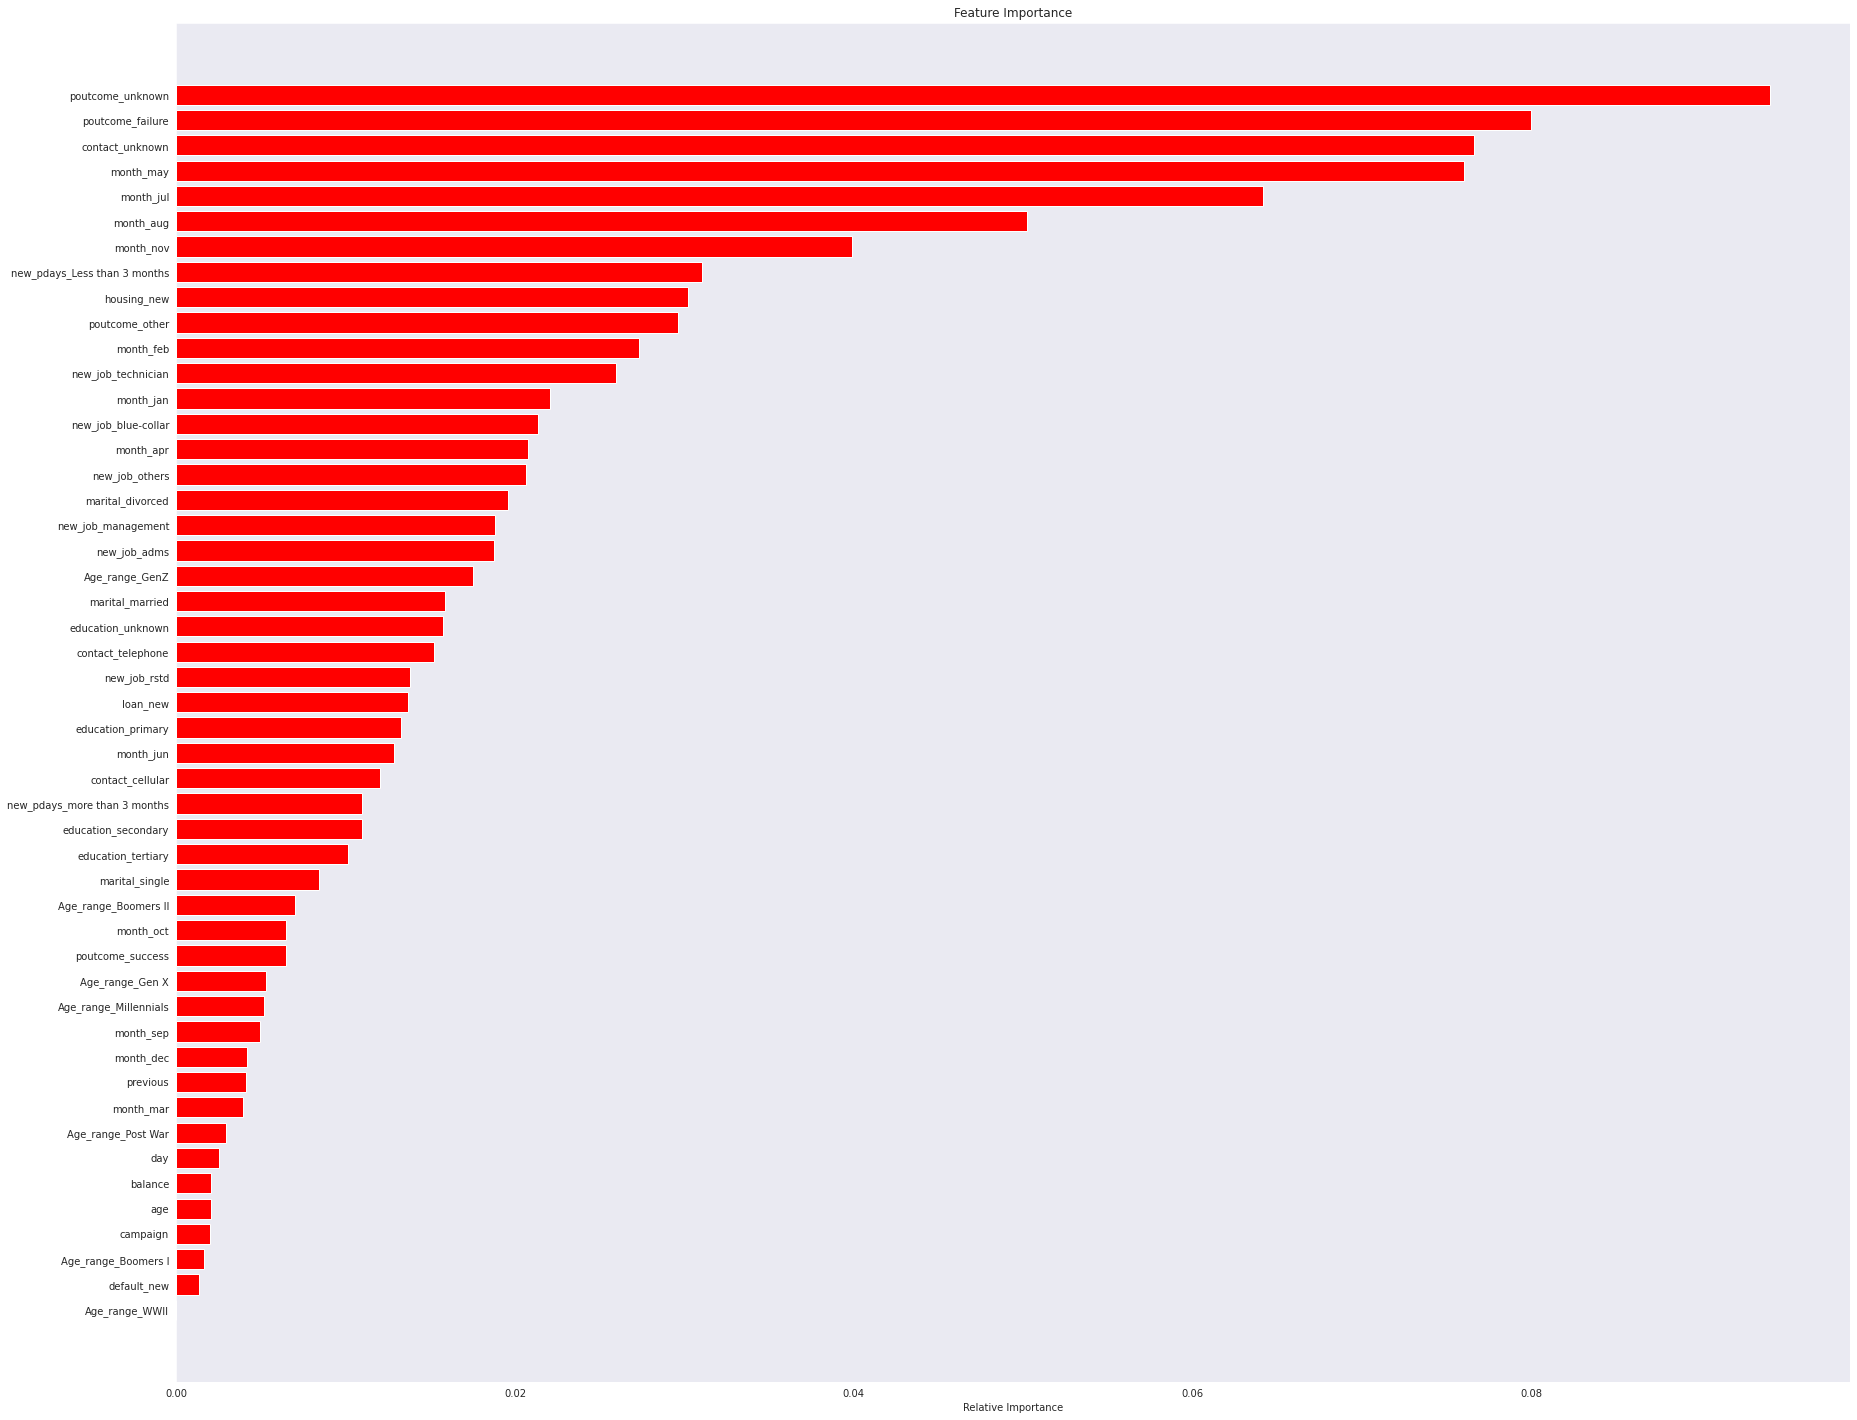

In [ ]:
'''Implementing Random Search CV to get best parameters''' 
xgbc_grid=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#Fitting model 
fit_mod(xgbc_grid, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model'''  
''''''
'''''' 
# important features 
'''Important Feature for XG Boost Classifier'''
imp_fe(xgbc_grid)

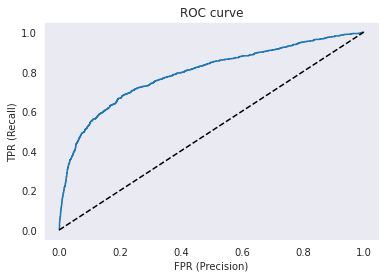

In [ ]:
roc_score_xgb,xgb_fpr,xgb_tpr,Xgb_probability = Roc_curve(xgbc_grid,X_train_sm, X_test, y_train_sm, y_test)

### 3.Gradient Boosting Classifier

Training accuracy Score    :  0.9293777316605352
Testing accuracy Score :  0.8913091798177373
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8294
           1       0.37      0.57      0.45       704

    accuracy                           0.89      8998
   macro avg       0.67      0.75      0.70      8998
weighted avg       0.92      0.89      0.90      8998



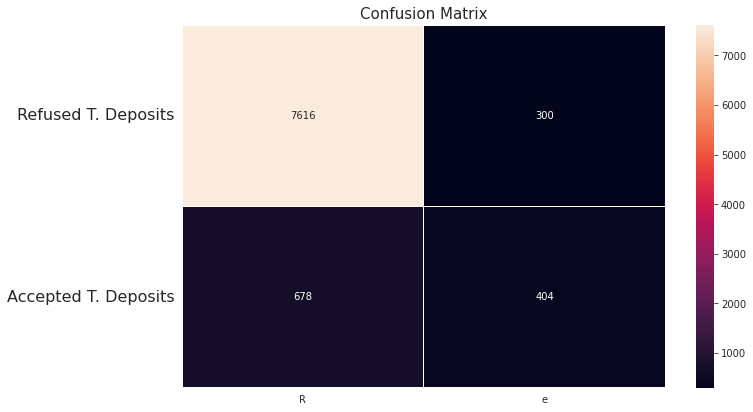

In [ ]:
#Fitting Model
fit_mod(xgbc, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model'''  
''''''
'''Confusion Matrix'''
confu_mat(xgbc, X_train_sm, X_test, y_train_sm, y_test)

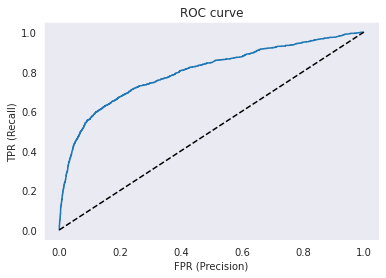

In [ ]:
#Auc Roc curve
roc_score_xgb,xgb_fpr,xgb_tpr,Xgb_probability = Roc_curve(xgbc, X_train_sm, X_test, y_train_sm, y_test)

With HyperParameter tuning 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training accuracy Score    :  0.99340957093586
Testing accuracy Score :  0.8938653034007558
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8477
           1       0.30      0.62      0.40       521

    accuracy                           0.89      8998
   macro avg       0.64      0.77      0.67      8998
weighted avg       0.94      0.89      0.91      8998



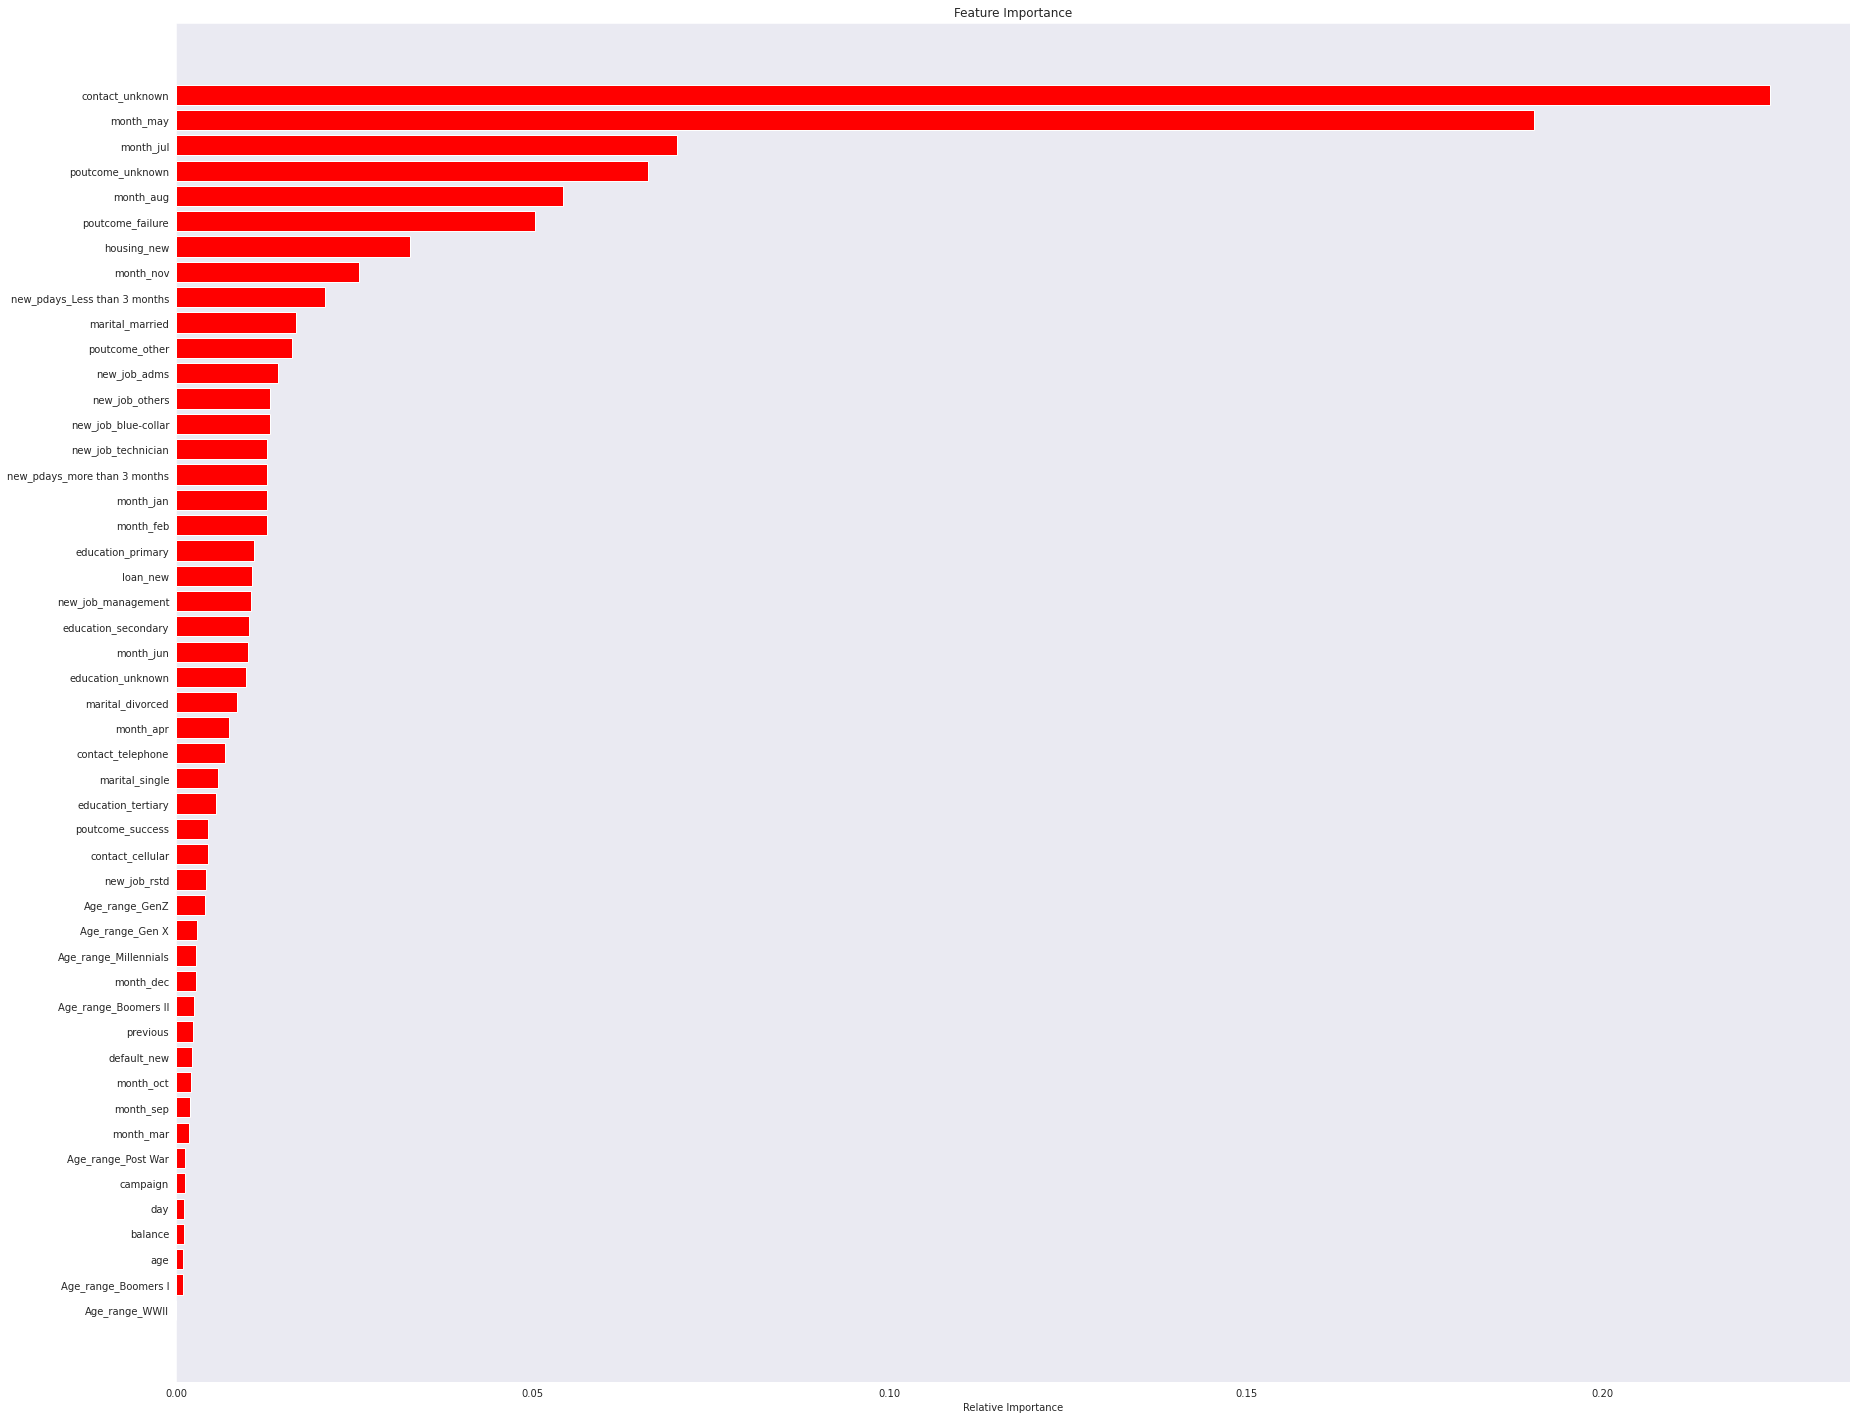

In [ ]:
# Defining Parameters 
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

'''Random Search Cv to get the best parameters ''' 
xgbc_grid=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#Fitting the model 
fit_mod(xgbc_grid, X_train_sm, X_test, y_train_sm, y_test)
'''Performance Matrics of the model'''  
''''''
'''''' 
# important features 
'''Important Feature for XG Boost Classifier'''
imp_fe(xgbc_grid)

### 4.Comparision of different classifiers 

In [ ]:
#roc_auc_score for different classifiers
from sklearn.metrics import roc_auc_score
print('Gradient Boosting Classifier Score: ',    roc_auc_score(y_test, gb_probability))
print('Random Forest Classifier: ',              roc_auc_score(y_test, rfc_probability))
print('XGB Classifier: ',                        roc_auc_score(y_test, Xgb_probability))


Gradient Boosting Classifier Score:  0.9372122629569817
Random Forest Classifier:  0.7965420650658159
XGB Classifier:  0.7982332280068258


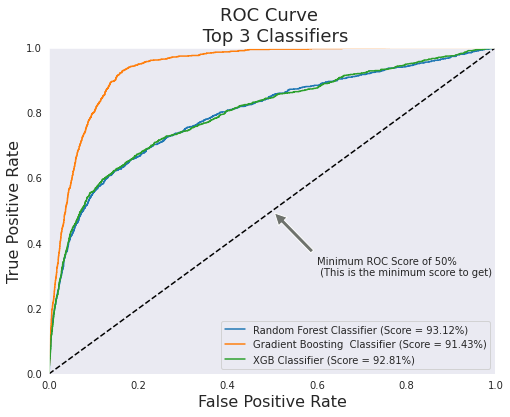

In [ ]:
#roc curves
def graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (Score = 93.12%)')
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting  Classifier (Score = 91.43%)')
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier (Score = 92.81%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr)
plt.show()

# **IV.** Conclusion


In [ ]:
print('**** Comparison of different models With and without Duration   ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score','roc_auc_score'])
'''With Duration'''
table.add_row(['WITH DURATION', '',  '' ,  '' , '',''])
table.add_row(['', '',  '' ,  '' , '',''])
table.add_row(['Gradient Boosting', 0.908535,  0.55 ,  0.64 , 0.59,0.937212])   #with_Duration
table.add_row(['XGB', 0.903422, 0.49, 0.63 , 0.55,0.931930 ])                   #with_Duration
table.add_row(['Random Forest ', 0.902422,  0.44 , 0.64 , 0.52,0.930817])       #with_Duration
'''#Without Duration'''
table.add_row(['', '',  '' ,  '' , '',''])
table.add_row(['', '',  '' ,  '' , '',''])
table.add_row(['WITHOUT DURATION', '',  '' ,  '' , '',''])
table.add_row(['', '',  '' ,  '' , '',''])
table.add_row(['Random Forest', 0.889864, 0.31, 0.60 ,0.41,0.796542])           #without Duration
table.add_row(['XGB', 0.894754,  0.31, 0.62,0.40,0.798233])                     #without Duration
table.add_row(['Gradient Boosting', 0.893865, 0.31, 0.62, 0.41,0.937212])       #without Duration

print(table)

**** Comparison of different models With and without Duration   ****
+-------------------+---------------+-----------+--------+----------+---------------+
|       Model       | Test Accuracy | Precision | Recall | F1_score | roc_auc_score |
+-------------------+---------------+-----------+--------+----------+---------------+
|   WITH DURATION   |               |           |        |          |               |
|                   |               |           |        |          |               |
| Gradient Boosting |    0.908535   |    0.55   |  0.64  |   0.59   |    0.937212   |
|        XGB        |    0.903422   |    0.49   |  0.63  |   0.55   |    0.93193    |
|   Random Forest   |    0.902422   |    0.44   |  0.64  |   0.52   |    0.930817   |
|                   |               |           |        |          |               |
|                   |               |           |        |          |               |
|  WITHOUT DURATION |               |           |        |          |  

Gradient Boosting   has shown the best performance, but in the end it was able to identify slightly more that a half of positive outcomes, which tells me there must be ways to improve it. Maybe I need more data or modify what I have. The data science process never ends.

Key outcomes of the analysis are the recommendations for future marketing campaigns:


*   The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490$ are more likely to subscribe for term deposit, so future address those customers.

*   The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.

*   Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.
* If the clients are contacted twice in first 10 days of the month, then it is more likely that call will be converted to subscription.

* Clients take more subscriptions in a month of January, May or August.

* If clients are already paying housing loans, then it is more likely that they will opt for term deposit.

* As call duration was our star performer, we see a sharp decrease in auc-roc score when we remove this column 

* Since we have added synthetic datapoints to handle the huge class imbalance in training set, the data distribution in train and test are different so the high performance of models in the train set is due to the train-test data distribution mismatch and not due to overfitting.